## Animal Shelter Outcomes: A Classification Problem
#### Alex Matsunami, RJ Smith, Cory Nichols

### Table of Contents
- [Lab 1 Start](#Lab1)
<br>- [Data Overview and Feature Engineering](#Data)</br>
<br>- [Exploratory Data Analysis](#Viz)</br>
<br></br>
- [Mini Lab Start](#Mini)
<br>- [Logistic Regression Analysis](#Logit)</br>
<br>- [Support Vector Machine Analysis](#SVM)</br>
<br></br>
- [Lab 2 Start](#Lab2)
<br>- [Classification Task 1: Outcome](#task1)</br>
<br>- [Classification Task 2: Spayed or Neutered](#task2)</br>


<a id='Lab1'></a>
## Business Understanding


Millions of animal companions end up in shelters each year in the United States. These animals may be stray, rescued from a difficult situation or given up by their previous families. Each year, roughly 40 percent of all dogs and cats in shelters are euthanized. 

Our dataset comes from the Austin Animal Center in Austin, Texas and is part of a Kaggle competition. Using this data, we hope to find trends or rule sets identifying the outcomes of animals in shelters. The findings would subsequently drive shelter practices, hopefully for more social good than business good. For instance, if spaying or neutering a dog or cat is highly suggestive of a favorable outcome for an animal, shelters should implement policies ensuring all animals are fixed prior to adoption. This practice may cost the shelter more money, but would improve the welfare of the animal population. Further, could something as simple as giving each an animal a name drive a more favorable outcome? This particular practice would cost nothing but time and in turn improve the welfare of the animal population in cities. Cost savings, however, could be gained from our analysis. For instance, it may be easy enough to automate intake and processes for certain breeds or genders of animals while focusing attention on breeds or genders of animals that the data indicate "need more help."

We intend to use the 27 thousand records in the training set as a reference for other major cities in the United States, where most animal shelter practices are similar from an intake and outcome perspective. Our dataset includes statistics on breed, color, sex, and age from the Austin Animal Center.

Success should be categorized into analytical and business goals. Analytical goals would be based on classification accuracy on a sizeable test data set given by a confusin matrix where overall classification accuracy is greater than 85% at minimum with at least 85% precision. Further, and possibly more importantly, we hope our analysis drives at least a 20% decrease in animal euthanizations and transfers combined over a two calendar year period.  


<a id='Data'></a>
## Data Meaning and Data Types

#### Overview

The original shelter outcomes dataset obtained from Kaggle.com contained the following ten attributes: Animal ID, Name, DateTime, OutcomeType, OutcomeSubtype, AnimalType, SexuponOutcome, AgeuponOutcome, Breed, and Color. The training dataset in use is 26,729 records while the test dataset contains roughly 12,000 records. We will be utilizing the training dataset. Each attribute in the training dataset is categorical, with AgeuponOutcome to be converted to continuous. 

#### The Target Feature

OutcomeType is a nominal attribute and our target variable / feature with five levels: Return_to_owner, Euthanasia, Adoption, Transfer, and Died. Adoption is the level of OutcomeType our business clients are particularly interested in increasing, while euthanizations, return_to_owner and transfers are levels of the target feature we are looking to help decrease via data analysis.

OutcomeSubtype is a nominal attribute with 16 categories which represent subcategories of our target variable: OutcomeType. Data is missing for roughly half of the dataset for this feature. OutcomeSubtype is not a critical feature, contains too much missing data and too many levels to efficiently classify, therefore it will likely be dropped. 

#### Explanatory Features

The explanatory features in our dataset are made up of AnimalID, Name, DateTime, AnimalType, SexuponOutcome, AgeuponOutcome, Breed and Color. Perusing the data at a high level, we can easily see that there are many opportunities to split the data into valuable, new features which will help train our classification algorithm more effectively.

AnimalID is a unique identifier given to every animal that enters a shelter. For the purpose of statistical analysis, the Animal ID's or substring of the animal ID does not provide valuable information and will be removed from the dataset. 

Name is a nominal feature with 6374 different names represented in the dataset. This feature may be valuable from a classification standpoint: does a pet being named increase the chances of adoption? The most frequent animal name in our dataset is 'Max.'

DateTime is a temporal feature which denotes the time at which an outcome occurred. In particular, this attribute is useful from a data analysis standpoint only. For instance, do euthanizations occur at a particular point during the day? However, from a classification standpoint, we do not expect this feature to be valuable.

AnimalType is a nominal feature with two levels: Cat and Dog. This feature will likely be a critical feature for classification and data analysis.

SexuponOutcome is a nominal categorical feature with five levels: Neutered Male, Intact Male, Spayed Female, Intact Female, and Unknown. This attribute can easily be split into separate nominal features indcating if an animal is fixed and the gender of the animal. 

AgeuponOutcome is an ordinal feature with 44 levels, or different ages that were reported for animals upon outcome. In order to normalize this feature, we will attempt to convert AgeuponOutcome into days. Examples of levels in this feature include: 1 year, 15 days, 7 months. Each level begins with an integer in every case. The most frequent level is '1 year.'

Breed is a nominal categorical feature with 1380 levels that represent different breeds for both dogs and cats. Breed holds generic levels such as "domestic shorthair" for dogs, which may indicate an inability to truly determine the breed type. We will need to be cognizant of this fact when training our classification model. This feature holds many opportunities for simplification and feature creation and transformation. For instance, we can identify breeds with a 'reputation', size of the animal and popular breeds.

Finally, color is another nominal categorical feature with 366 level that represent the different combination colors of the animals entering the shelter. An example of a level of Color is "Brown/White," with the first color representing the primary color of the animal. Due to the number of levels in the Color feature, aggregation of the levels of color will be needed to effectively train our classification algorithm and derive business impact. 

<a id='clean'></a>
## Data Preprocessing: Transformation and Statistics 

In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler,Imputer
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')
breedMap = pd.read_csv('breed_size.csv')
breedMap['Size'] = breedMap.Size.apply(lambda x: x.strip())


Our dataset is made up of 10 variables, many of which can be split or transformed into additional variables. Further, the majority of the variables are categorical: mostly nominal variables except for ordinal variables like Age and temporal variables like DateTime. Some variables, such as AnimalID, will provide no value in our analysis.

Our class feature or target feature is OutcomeType. We are interested in classifying animal outcome types given the other explanatory variables, which we will elaborate upon further. Let's take a look at a few objects to get our feet wet.


### Data Quality and Cleanup

Before we embark on exploratory data analysis and visualization, it's critical our data is clean. This means imputation or dropping missing values and objects if necessary. Below, we will investigate missing values and handle any exceptions in our dataset.

In [3]:
print 'Data types and counts:\n\n', df.info(), '\n\n'
print 'Number of nulls in the data set: \n', df.isnull().sum(),'\n\n'
print 'Data Descriptions: Counts, Frequency'

df.describe()

Data types and counts:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26729 entries, 0 to 26728
Data columns (total 10 columns):
AnimalID          26729 non-null object
Name              19038 non-null object
DateTime          26729 non-null object
OutcomeType       26729 non-null object
OutcomeSubtype    13117 non-null object
AnimalType        26729 non-null object
SexuponOutcome    26728 non-null object
AgeuponOutcome    26711 non-null object
Breed             26729 non-null object
Color             26729 non-null object
dtypes: object(10)
memory usage: 2.0+ MB
None 


Number of nulls in the data set: 
AnimalID              0
Name               7691
DateTime              0
OutcomeType           0
OutcomeSubtype    13612
AnimalType            0
SexuponOutcome        1
AgeuponOutcome       18
Breed                 0
Color                 0
dtype: int64 


Data Descriptions: Counts, Frequency


,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,26729,19038,26729,26729,13117,26729,26728,26711,26729,26729
unique,26729,6374,22918,5,16,2,5,44,1380,366
top,A705677,Max,2015-08-11 00:00:00,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,1,136,19,10769,7816,15595,9779,3969,8810,2824



Based upon the information retrieved from the DataFrame, we are dealing with roughly 27 thousand records in the training set. We are only interested in the "OutcomeType" as our y (classifier) data. Outcome subtype is a sparse drill down on the Outcome type with sub-codes which are not explained thoroughly. Therefore, we recommend dropping this value as it is aub-variable of the outcome variable we are interested with roughly 50% valid values.

The good news is: 40% of animals are being adopted, most of which are neutered male dogs about a year old. 

In regard to new feature creation, we observe multiple opportunities. For instance, it will be interesting to see if having a name affects outcome and if the type of breed is aggressive (has a "reputation"). We can also see converting the AgeuponOutcome being valuable. 

However, before we create or transform features, let's clean up the data a bit more. There are a few nulls in our dataset. Of concern are the nulls in AgeuponOutcome and SexuponOutcome, in which there are 18 and 1 null values, respectively. This is not a large concern given the size of our dataset and what looks to be good quality data overall. However, we will attempt to keep the age nulls in the dataset. Losing one object in the dataset due a null in SexuponOutcome is not a concern. Because we care about whether or not a pet is named, the nulls in Name are not a concern. Further, OutcomeSubtype is simply a click down of OutcomeType, which is our classifier, and is quite sparse. We are dropping OutcomeSubtype, we are not concerned with the nulls.


## Data Creation and Transformation

In [4]:
del df['OutcomeSubtype'], df['AnimalID'] # drop extraneous data  columns
df = df.reset_index() # reset index to ensure further operations are executed correctly

Categorical Filling Strategy:
Outside of the nulls, there is a string for age: "0 years" with 22 instances. This provides about "0" value. We will also fill the single "unknown" in the sex column vector with the same logic. 

We have adjusted our categorical filling strategy based on professor feedback to use the mode of the categories. This simiplifies our logic from our previous lab, where we used a random selection of the top 3 most frequent ages.

We will also replace the one null for SexUponOutcome with a simple mode of the entire feature 

In [5]:
freq = df.AgeuponOutcome.mode().values[0].rstrip('s')
gen = df.groupby(['AnimalType']).agg(lambda x: x.value_counts().index[0])['SexuponOutcome'] # both neutered male

df['AgeValue'] = df.AgeuponOutcome.apply(lambda x: freq if pd.isnull(x) else x.rstrip('s'))

ageMap = {'year': 365, 
          'week': 7, 
          'month': 30,
          'day': 1} 

df['AgeValue'] = df['AgeValue'].apply(lambda x: ageMap.get(x.split()[1]) * int(x.split()[0] if int(x.split()[0]) != 0
                                                                             else 1))
df.SexuponOutcome = df.SexuponOutcome.apply(lambda x: gen[0] if pd.isnull(x) or x=='Unknown' else x)

In [6]:
del df['index']
print 'Number of nulls in the data set: \n', df.isnull().sum(),'\n'
df.head()

Number of nulls in the data set: 
Name              7691
DateTime             0
OutcomeType          0
AnimalType           0
SexuponOutcome       0
AgeuponOutcome      18
Breed                0
Color                0
AgeValue             0
dtype: int64 



,Name,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,AgeValue
0,Hambone,2014-02-12 18:22:00,Return_to_owner,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,365
1,Emily,2013-10-13 12:44:00,Euthanasia,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,365
2,Pearce,2015-01-31 12:28:00,Adoption,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,730
3,NaN,2014-07-11 19:09:00,Transfer,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,21
4,NaN,2013-11-15 12:52:00,Transfer,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,730



All columns outside of the name column have been dropped or imputed and are now non-null.

Let's create some useful variables in our data set. It would be interesting to investigate whether or not a potential adoptee having a name has an effect on their outcome.

The gender and what we will call "is_intact" (whether an animal is intact (not fixed)) are also interesting variables to investigate.

Further, it would be better to represent age as a continuous ratio variable. We will transform age into day and check it's distribution for normality.


In [7]:
np.unique(df.SexuponOutcome)

array(['Intact Female', 'Intact Male', 'Neutered Male', 'Spayed Female'], dtype=object)

In [8]:
print 'There are %d unique names in the data set' % len(np.unique(df['Name'].values))

# 6375 unique names. That is quite a few names. Let's generalize into a binary feature called has_name instead:
df['has_name'] = df['Name'].apply(lambda x: 0 if pd.isnull(x) else 1)

# Further, let's split out the intactness of an animal: whether or not the animal has been spayed or neutered
# as well as the gender:

df['is_fixed'] = df['SexuponOutcome'].apply(lambda x: 'Fixed' if x.split()[0] in ['Spayed','Neutered'] else 'Intact')
df['gender'] = df['SexuponOutcome'].apply(lambda x: x.split()[1])

There are 6375 unique names in the data set


C:\Anaconda2\lib\site-packages\numpy\lib\arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))



Let us also identify potentially 'aggressive' breeds using a bit of regex and top 10 aggressive breeds list: 
http://www.therichest.com/rich-list/the-biggest/the-worlds-10-most-dangerous-dog-breeds/?view=all

We will create a binary feature 'is_aggressive.' If the dog's breed is contained in the aggressive breed list, is_aggressive will be 1, else it will be 0.  


In [9]:
import re

agg_breeds = ['Bull','Doberman','Rottweiler','Husky','German','Boxer','Malamute','Dane']

df['is_aggressive'] = df['Breed'].apply(lambda x: re.split('\W+',x))

for idx, i in enumerate(df['is_aggressive'].values):
    if len(agg_breeds) != len(set(agg_breeds).difference(i)):
        df.set_value(idx, 'is_aggressive', 1)
    else:
        df.set_value(idx, 'is_aggressive', 0)      


Let's also grab the primary color using same regex approach and reduce the number of categories in color. We will map the primary color (the first color listed) to a colorMap dictionary.


In [10]:
colorMap = {'exotic':['Agouti','Calico','Lynx','Tricolor','Tortie','Flame','Torbie'], # these are some odd colors...
            'dark':['Black','Chocolate','Liver','Sable','Seal','Red'],
            'neutral':['Gray','Silver','Tan','Buff','Brown','Fawn'],
            'light':['Cream','Blue','Pink','White','Yellow','Lilac','Ruddy','Apricot','Orange','Gold']}

# use pandas built ins to munge the data a bit faster - use rename, split_interval to convert age
df['primary_color'] = df['Color'].apply(lambda x: re.split('\W+',x)[0])

for idx, color in enumerate(df['primary_color'].values):
    for k,v in colorMap.items():
        if color in v:
            df.set_value(idx,'primary_color', k)

In [11]:
df.head(3)

,Name,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,AgeValue,has_name,is_fixed,gender,is_aggressive,primary_color
0,Hambone,2014-02-12 18:22:00,Return_to_owner,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,365,1,Fixed,Male,0,neutral
1,Emily,2013-10-13 12:44:00,Euthanasia,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,365,1,Fixed,Female,0,light
2,Pearce,2015-01-31 12:28:00,Adoption,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,730,1,Fixed,Male,1,light


One other critical attribute we are missing is animal size. We assume the size of an animal is extremely important, especially when it comes to adopting dogs. Therefore, we have retrieved the American Kennel Club's (http://www.akc.org/dog-breeds/) listing of breeds and associated sizes. Because there are so few toy breeds listed, we combined toy and small into "small." For breeds that were not represented in AKC's list (there were about 20), each  was mapped to size buckets based on the following logic: Small (avg weight <= 20 lbs ), Medium (<= 65 lbs), Large (<= 100 lbs), Giant (> 100 lbs). All cats were mapped to "small." We expect the size feature to be more relevant for dogs, and we expect it to be significant. We've also added in an indicator for the top 10 most popular dogs.

In [12]:
# set primary breed as the lookup
df['BreedLU'] = [i.rstrip('Mix').split('/')[0].strip() for i in df['Breed']] 

# zip up breed and size into a dict
sizeMapper = dict(zip(breedMap['Breed'], breedMap['Size'])) 

# map it, I love Pandas
df['size'] = df['BreedLU'].map(sizeMapper) 
df['size'] = np.where(df['AnimalType'].values == 'Cat', 'Small', df['size']) # set cats to small (unless Garfield)
del df['BreedLU'] # drop the lookup vector

In [13]:
# Source: http://www.petinsurance.com/healthzone/pet-articles/pet-breeds/Top-10-Dog-Breeds.aspx
topBreeds = ['Boxer', 'Rottweiler', 'Poodle', 'Yorkshire Terrier',
                'French Bulldog', 'Beagle', 'Bulldog',
                'Golden Retriever', 'German Shepherd', 'Labrador Retriever']

topBreedList = []
for i in df['Breed']:
    matched = False
    for topBreed in topBreeds:
        if topBreed in i:
            topBreedList.append(1)
            matched = True
            break
    if not matched:
        topBreedList.append(0)       

df['is_popular'] = topBreedList

In [14]:
from datetime import datetime
# let's also account for the time of day these actions happen as well as the day of the week
df['DateTime'] = df['DateTime'].astype(np.datetime64)

df['is_Weekday'] = df['DateTime'].apply(lambda x: 1 if datetime.weekday(x) < 5 else 0)

df['time_of_day'] = pd.cut(df.DateTime.dt.hour,[-1,11,17,1e6], 4, labels = [0,1,2])
df['time_of_day'] = df.time_of_day.astype(np.int64)
df['hour'] = df.DateTime.dt.hour
# morning, afternoon, evening

[Back to Lab 2!](#Lab2)

<a id='Viz'></a>
## Variable Investigation And Single Variable Data Visualization

First, let's convert categorical features to objects and make column names a little easier to follow:

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26729 entries, 0 to 26728
Data columns (total 19 columns):
Name              19038 non-null object
DateTime          26729 non-null datetime64[ns]
OutcomeType       26729 non-null object
AnimalType        26729 non-null object
SexuponOutcome    26729 non-null object
AgeuponOutcome    26711 non-null object
Breed             26729 non-null object
Color             26729 non-null object
AgeValue          26729 non-null int64
has_name          26729 non-null int64
is_fixed          26729 non-null object
gender            26729 non-null object
is_aggressive     26729 non-null object
primary_color     26729 non-null object
size              26729 non-null object
is_popular        26729 non-null int64
is_Weekday        26729 non-null int64
time_of_day       26729 non-null int64
hour              26729 non-null int64
dtypes: datetime64[ns](1), int64(6), object(12)
memory usage: 3.9+ MB


In [16]:
df.columns = ['Name','DateTime','Outcome','Type','SexuponOutcome','AgeuponOutcome','Breed','Color','Age_Value',
              'Has_Name','Is_Fixed','Gender','Is_Aggressive','Primary_Color','Size', 'Is_Popular','Is_Weekday'
              ,'time_of_day','hour']

categ = ['Type','Breed','Is_Fixed','Gender','Is_Aggressive', 'Primary_Color', 'Size','Has_Name',
       'Outcome','Is_Popular', 'Is_Weekday','time_of_day']

df[categ] = df[categ].astype(np.object)

The data is starting to tell more of a story with our transformed dataset. There are no longer nulls and it looks as if mostly small dogs with names make up a good portion the data set. Nearly 70% of animals in our dataset are fixed. Interestingly, domestic shorthair mixes dominate the data set from a breed perspective, which have 1380 unique values. This may be a "catch all" breed used to identify dogs the shelter had trouble identifying and may be a future issue from a classification standpoint.

We also transformed the age variable into a continuous feature. Let's ensure it has a valid data type and quickly take a look at its distribution and some other key statistics.

In [17]:
df['Age_Value'] = df['Age_Value'].astype(float)
df['logAge'] = np.log(df['Age_Value']).astype(float)
df['sqrtAge'] = np.sqrt(df['Age_Value']).astype(float)
df[['Age_Value','logAge','sqrtAge']].describe()

,Age_Value,logAge,sqrtAge
count,26729.000000,26729.000000,26729.000000
mean,794.142205,5.649281,22.754199
std,1082.353077,1.661986,16.625252
min,1.000000,0.000000,1.000000
25%,60.000000,4.094345,7.745967
50%,365.000000,5.899897,19.104973
75%,1095.000000,6.998510,33.090784
max,7300.000000,8.895630,85.440037


On average, animals are about two years old when adopted. Based simply on the range, age needs to be transformed if we are to use it as a continuous variable. Some animals are one day old upon outcome, while some are as old as 7300 days (20 years!). We will attempt two common methods: the natural log and square root transforms. We will use these transformations for ease of explanation to the business when back transforming and ensuring a more normal distribution for use in classification algorithms. 

Because age was technically a many-leveled categorical variable transformed to a continuous variable, we expect to see a stepped distribution. Because of this we will likely run algorithms with both the continuous and categorical versions of age.

First lets look at the original distribution of age, the log age and sqrt of age in violin plots:

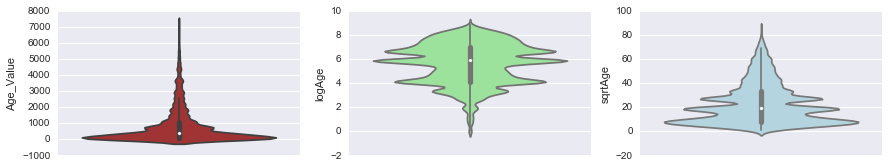

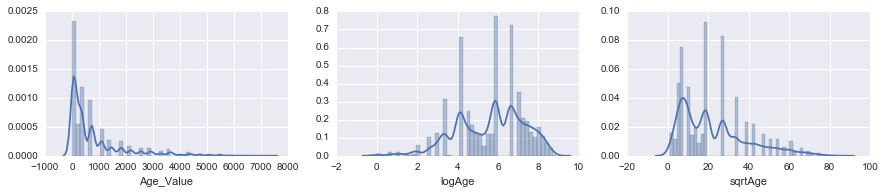

In [18]:
from random import random
c = ['firebrick','lightgreen','lightblue']
atts = ['Age_Value','logAge','sqrtAge']

for i in range(2):
    plt.figure(figsize=(20,15))
    for index, plots in enumerate(atts):
        plt.subplot(5, 4, index + 1) # plot them all on one row
        if i == 0:
            sns.violinplot(y = plots, data= df, color = c[index])
        else: sns.distplot(df[plots])
plt.show()

Violin plots allow us to account for multi-modality while also giving us standard box plot information. These charts plot kernel density estimates on each side of the box plot. As we can see above, our data is very much multi modal.  We also plot histograms and overlayed KDEs and end up with the same outcome. Let's also look at EDFs and normality tests to confirm a lack of age normality:

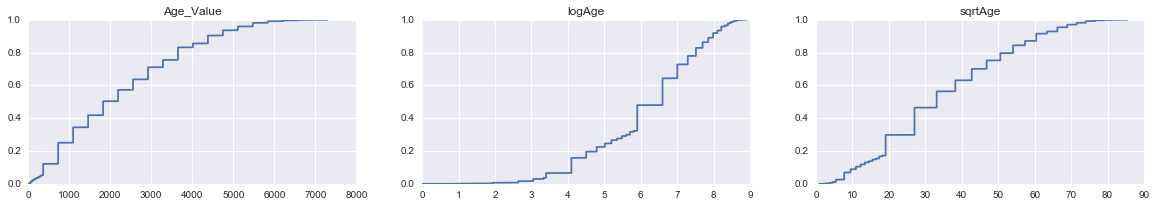

In [19]:
# credit to Eric Larson!
plt.figure(figsize=(20,10))
for index, feature in enumerate(['Age_Value','logAge','sqrtAge']):
    plt.subplot(3, 3 , index + 1)
    x_ax = np.sort(df[feature]) # sort the feature ascending
    y_ax = np.cumsum(x_ax) # take cumulative sum, this creates an array of each observation adding to total sum
    y_ax = y_ax / np.max(y_ax) # get each observation's percentage of total sum of attribute
    plt.plot(x_ax,y_ax) # plot it
    plt.title(feature) # give it a title
    
plt.show()

# It's apparent age is not normally distributed and the transforms dont do much to help us.

In [20]:
from scipy.stats import normaltest
vars = ['Age_Value','logAge','sqrtAge']
for i in vars:
    print i.ljust(10), 'chi-square:', round(normaltest(df[i])[0]), '\tp-value: {:.2f}'.format(normaltest(df[i])[1])

Age_Value  chi-square: 11283.0 	p-value: 0.00
logAge     chi-square: 916.0 	p-value: 0.00
sqrtAge    chi-square: 3273.0 	p-value: 0.00


As shown above, the numerically converted Age is right skewed with a median value of about 365 days. This skewness is attributed to the younger ages of adopted animals. Empirical distribution functions show our data in a more quantitative fashion: showing probabilities of of obtaining values on the y axis and the value range itself on the x-axis. For instance, there is roughly an 85% chance of finding an age less than 4000 days in our dataset. We are looking for a relatively smooth upward curve that is not skewed severely 

Transforming the feature Age into a log representation and sqrt representation doesn't provide gaussian distributions, confirmed by EDF plots and D'Agostino's normal test. Depending on the classification algorithm used, we will likely need to utilize a categorical variable with levels for Age. Let's go ahead and create that feature now.

In [21]:
# let's convert age to an age range, if an animal is a year or less: young, up to 8 years: adult, 8+ years: senior
df['age_range'] = pd.cut(df.Age_Value/365,[0, 1, 8, 1e6],3, labels=['a_young', 'b_adult', 'c_senior'])
del df['logAge']
del df['sqrtAge']

Now that we've thoroughly analyzed and visualized age, we will move on to categorical variables. The rest of our dataset is primarily categorical (both nominal and ordinal variables). Visualizations of counts will be the priority. Of interest in particular are the variables we spent a significant amount of time creating, such as size and aggressive breeds.

To be thorough let's go ahead and plot percentage bars and investigate counts, which is common for individual categorical variables:

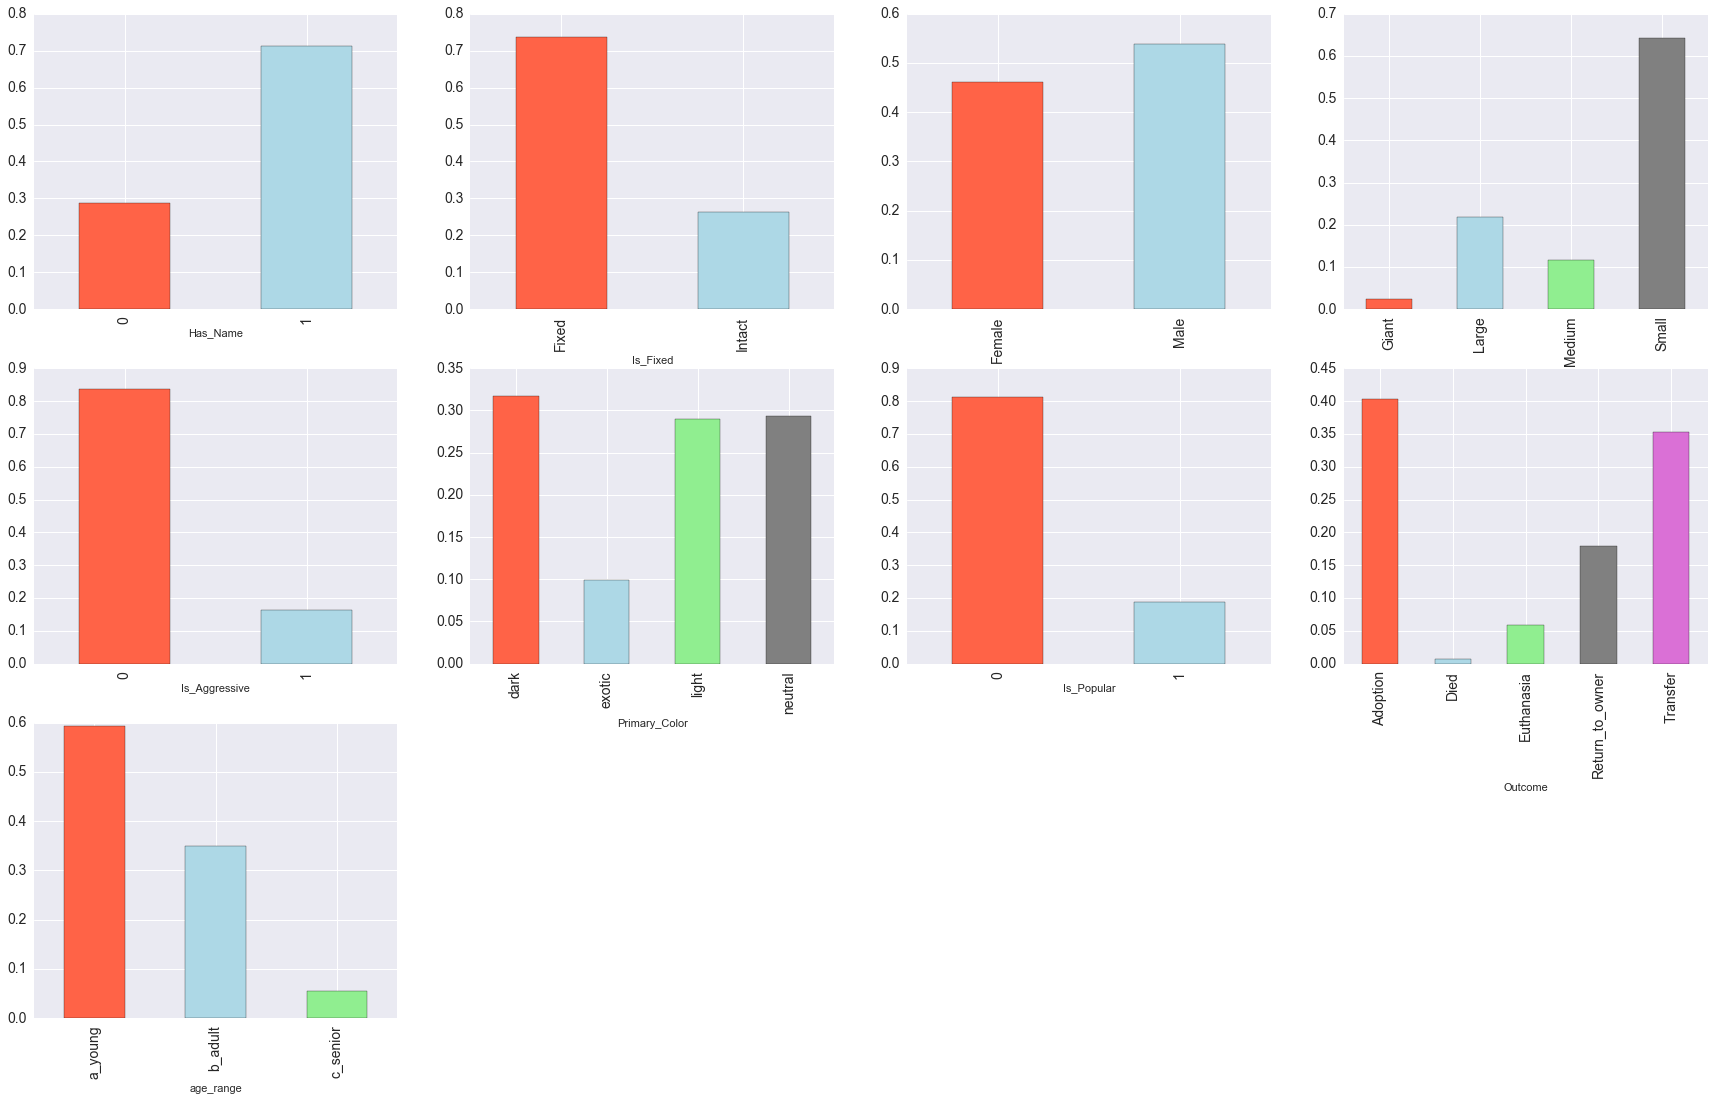

In [22]:
import matplotlib

features = ['Has_Name','Is_Fixed','Gender','Size','Is_Aggressive','Primary_Color', 'Is_Popular','Outcome','age_range']

plt.figure(figsize=(30,18))
for index, feature in enumerate(features):
    plt.subplot(3, 4, index +1)
    groups = df.groupby(feature)['Outcome'].count()/len(df)
    ax = groups.plot(kind = 'bar', color =['tomato','lightblue','lightgreen','gray','orchid'], fontsize=14)

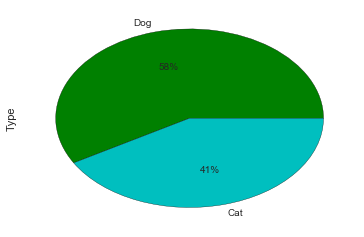

In [23]:
df.Type.value_counts().plot(kind='pie', autopct='%1d%%', colors = ['g', 'c'])

Some interesting discoveries come out of simple percentages: for instance, most animals being adopted are small. This is likely because cats are also categorized into the small category -- we will explore animal type crosstabs more thoroughly. Most critically, adoption rates show promise: 40 percent of all animals are adopted. Our business partners are looking to increase this number. Further, given Austin's policy of no euthanizations unless aggressive or sick, it's easy to see that most animals do indeed survive, however, most are transferred to other shelters. Transfers come with high cost for our business partners. This is likely a metric they'd like to reduce. The more an animal is passed through the system, the larger emotional detriment and the higher cost for the shelters in managing input/output as well as standard medical treatment, room and board and surgical operations. Further, it looks as though the most popular breeds are not present in the sample of shelter animals, which could be a bad sign for future adoptability.

Based on these charts, we also likely can combine size into a three level factor feature by combining giant into large since it is about 2% of the dataset. Further, most animals are dark colored and fixed. Fixed animals make up almost 75% of the dataset while dark colored animals are 40% of the sample size.

Further, there are more dogs than cats in our dataset. This is actually a surprise, given that stray cats are far more frequently encountered than stray dogs. 

## Feature Relationships, Correlative Analysis and Further Visualizations

Visualizing relationships of categorical variables can be difficult. However, we're going to start with a mosaic plot (tree map) to show relative sizes of categorical variables and how they interact with one another. First, we are going to investigate the type of animal, split and sized by Is_Intact and Size

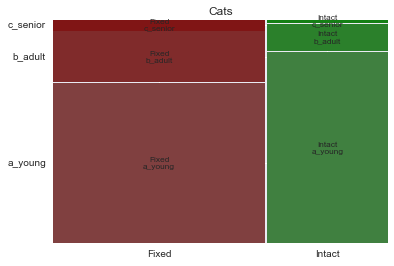

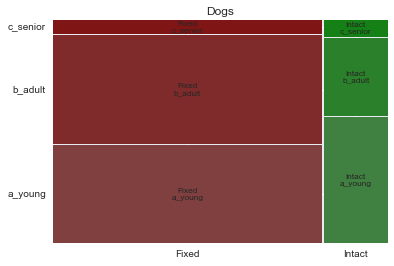

In [24]:
# mosaic plot for dogs on size and color
from statsmodels.graphics.mosaicplot import mosaic
for i in np.unique(df['Type']):
    mosaic(df[df['Type'] == i], ['Is_Fixed','age_range']),
    plt.title(i+'s')
    plt.show()

We immediately see that most animals are fixed, which is something we could tell with univariate analysis. However, for both dogs and cats, we notice that younger animals in general have a higher rate of being intact. This is likely because the animals are newer arrivals, however, our dataset does not contain temporal data in order to determine this effect. 

Is_Aggressive          False      True 
Size   age_range                       
Giant  a_young     71.147541  28.852459
       b_adult     53.535354  46.464646
       c_senior    48.571429  51.428571
Large  a_young     42.121849  57.878151
       b_adult     33.420074  66.579926
       c_senior    49.834983  50.165017
Medium a_young     85.490932  14.509068
       b_adult     83.436533  16.563467
       c_senior    88.205128  11.794872
Small  a_young     98.850119   1.149881
       b_adult     99.392302   0.607698
       c_senior   100.000000   0.000000


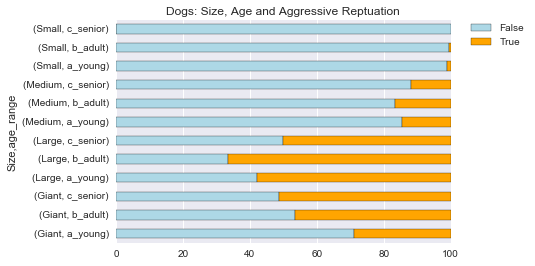

In [25]:
dfdogs = df[df.Type == 'Dog']
dogs = pd.crosstab([dfdogs['Size'], dfdogs['age_range']], dfdogs.Is_Aggressive.astype(bool))
dogs_rate = dogs.div(dogs.sum(1).astype(float), axis=0)*100
print dogs_rate
dogs_rate.plot(kind='barh', stacked=True, color =['lightblue','orange'], legend=False)
plt.title('Dogs: Size, Age and Aggressive Reptuation')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Here, we are looking at dog age ranges and aggressiveness. Some interesting trends are readily apparent: large, adult dogs tend to be more 'aggressive' breeds, even moreso than giant dogs. As expected, small dogs don't have much of a reptuation of being 'dangerous' or aggressive. 

## Additional Work: Algorithmic Setup and Numeric Conversions

To make things a bit easier to visualize in seaborn and also set up our data for classification algorithms, let's go ahead and set up dummies and remap some of our categorical variables to integers where appropriate.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26729 entries, 0 to 26728
Data columns (total 20 columns):
Name              19038 non-null object
DateTime          26729 non-null datetime64[ns]
Outcome           26729 non-null object
Type              26729 non-null object
SexuponOutcome    26729 non-null object
AgeuponOutcome    26711 non-null object
Breed             26729 non-null object
Color             26729 non-null object
Age_Value         26729 non-null float64
Has_Name          26729 non-null object
Is_Fixed          26729 non-null object
Gender            26729 non-null object
Is_Aggressive     26729 non-null object
Primary_Color     26729 non-null object
Size              26729 non-null object
Is_Popular        26729 non-null object
Is_Weekday        26729 non-null object
time_of_day       26729 non-null object
hour              26729 non-null int64
age_range         26729 non-null category
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), object(16)
memory u

In [27]:
# size is ordinal, lets create a dict and map it
sizeMap = {'Giant':4,'Large':3,'Medium':2,'Small':1}
df['Size'] = df['Size'].map(sizeMap)

# grab dummies for our nominal variables
df = df.join(pd.get_dummies(df['Primary_Color']))

# relabel our outcomes
classLabels = LabelEncoder()
df['Outcome_Label'] = classLabels.fit_transform(df['Outcome']) 
df['Primary_Color_Label'] = classLabels.fit_transform(df['Primary_Color']) 

Now, let's take a look at more relationships between our explanatory features. Specifically the age_value, size and intactness of dogs:

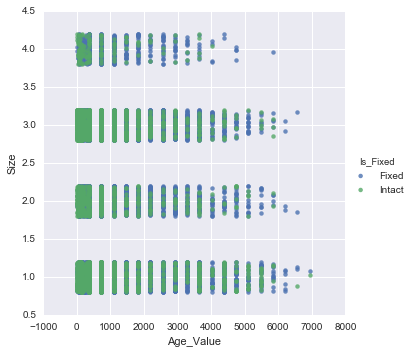

In [28]:
sns.lmplot("Age_Value", "Size", data=df[df.Type=='Dog'], hue = 'Is_Fixed', x_jitter=.2, y_jitter =.2, fit_reg=False)

This interesting scatterplot gives us a number of different pieces of valuable information on the dogs in our dataset. First, smaller dogs are the most frequently occurring of the sizes in our dataset, and also contain the oldest of the dogs. By jittering our data points, it looks as if larger sized dogs are fixed more often than other sizes. We also can easily confirm that younger dogs are intact more often than older dogs.

Lookup:
['dark' 'exotic' 'light' 'neutral']


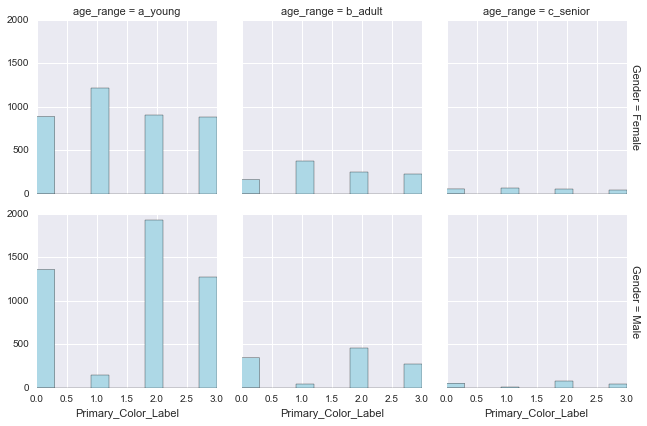

In [29]:
#df[df.Type=='Cat']
print 'Lookup:' 
print np.unique(classLabels.inverse_transform(df['Primary_Color_Label']))
g = sns.FacetGrid(df[df.Type =='Cat'], col = "age_range", row= "Gender", margin_titles=True)
g.map(plt.hist, "Primary_Color_Label" , color= "lightblue")

Looking at the distributions of our categorical variables, age range, gender and color, we can see that light colored, young males make up a large portion of our cats. There are few senior aged cats in our dataset in comparison to young cats. This is likely due to the high birth rates and litter sizes of cats. It is often common to see many kittens and few old cats in animal shelters when adopting. Interestingly, there are also many exotic colored female cats.

## Feature and Target: Visual Relationships and Analysis

Let's take a look at a formal test and visualization to see how our features relate to the outcome label. By using a chi-square test of independence, we will attempt to determine if our features are truly independent (not related) to outcome or if there is a relationship (dependency). Significance thresholds are set at .05.

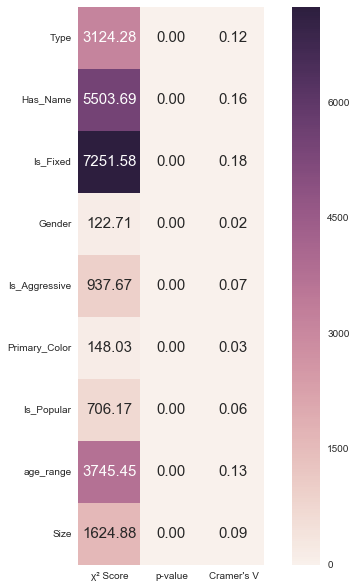

In [30]:
import scipy

cols = ['Type','Has_Name','Is_Fixed','Gender','Is_Aggressive','Primary_Color','Is_Popular','age_range','Size']

def chisqr(df, features):
    vals = []
    for i in features:
        cross = pd.crosstab(df[i], df['Outcome_Label'])
        chisq = scipy.stats.chi2_contingency(cross)
        cramer = np.sqrt((chisq[0]/len(df)) / np.minimum(len(df)-1,len(cols)-1))
        chisq = list(chisq[0:2])
        chisq.append(cramer)
        vals.append(chisq)
    return DataFrame(vals)

chi2 = u'\N{GREEK SMALL LETTER CHI}\N{SUPERSCRIPT TWO}'
plt.figure(figsize=(10,10))
hm = sns.heatmap(chisqr(df,cols),cbar=True,annot=True,square=True, fmt='.2f',annot_kws={'size':15},
                 yticklabels=cols,xticklabels=[chi2 + ' Score','p-value','Cramer\'s V'])
plt.show()

Based on a chi-squared test of independence, we determine that our categorical features are all significantly related to our target variable Outcome. In fact, the most dependent variable is Is_Intact, essentially stating that Outcome is highly dependent upon whether or not an animal is fixed. We also take a look at the effect size to determine the strength of association. As we can see, the strength of association between Is_Intact and Outcome is the highest at .19, which is only moderately associated. Most of the other categorical variables are either weakly or moderately associated with outcome. Of the variables, Is_Intact, age_range, has_name and Type would be our best predictors. Surprisingly, gender's effect size is quite small -- insignificant in fact, as well as the primary color of the animal.

Let's cut our visualizations a couple different ways now, based on these results.

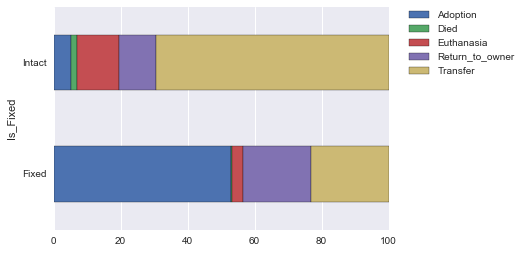

In [31]:
animals = pd.crosstab(df['Is_Fixed'], df['Outcome'])
rate = animals.div(animals.sum(1).astype(float), axis=0)*100
rate.plot(kind='barh', stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

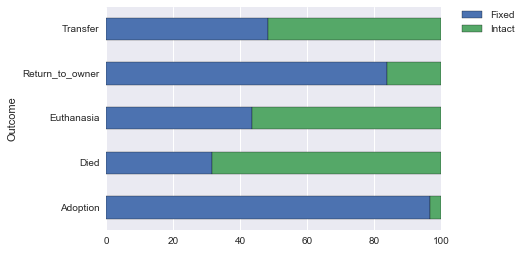

In [32]:
animals = pd.crosstab(df['Outcome'], df['Is_Fixed'])
rate = animals.div(animals.sum(1).astype(float), axis=0)*100
rate.plot(kind='barh', stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

Probably the most significant finding thus far: it looks as if over 50 percent of fixed animals are adopted. Specifically, looking at the second chart, over 90 percent of adopted animals are fixed. Given the moderate association found for Is_Intact, this is a critical datapoint discovered for our classification purposes going forward. Further, the majority of animals that perished were intact. This could be due to pre-existing conditions coming into the facility.

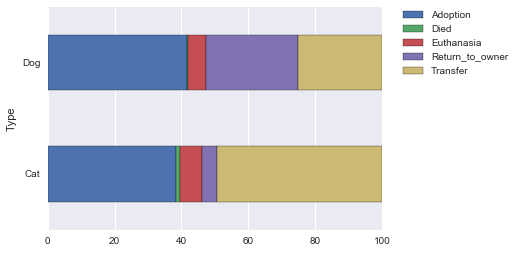

In [33]:
animals = pd.crosstab(df['Type'], df['Outcome'])
rate = animals.div(animals.sum(1).astype(float), axis=0)*100
rate.plot(kind='barh',stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Cats are transferred far more often than dogs, however, both are adopted at similar rate. Dogs are much more likely to be returned to their owners than cats. Of interest is the deaths among cats and dogs: only cats have died in our dataset. Thankfully both cats and dogs do not die or are not euthanized often. 

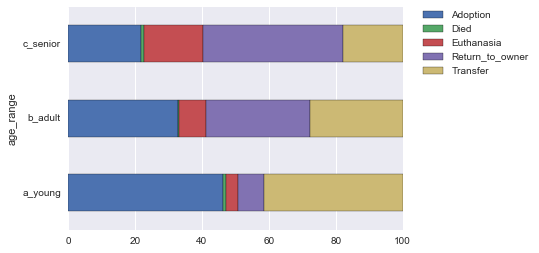

In [34]:
animals = pd.crosstab(df['age_range'], df['Outcome'])
rate = animals.div(animals.sum(1).astype(float), axis=0)*100
rate.plot(kind='barh',stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

As one could probably expect, young animals are adopted at higher rates than adult or senior animals. The highest rates of euthanasia occur in senior animals, likely due to failing health. Return to owners are also high in senior animals, most likely due to the inability for more senior animals to be adopted. Because age_range has a slight association with outcome and is one more the more associated features in our dataset, these are valuable findings prior to executing classification procedures.

## Preliminary Conclusion - End of Lab 1

Based on exploratory data analysis, our next step is to ensure our data is ready for learning a classification algorithm such as a decision tree or logistic regression. We can obviously use the information from the EDA performed to tweak parameters in our model or add weights appropriately, such as adding importance for intactness.

However, based on standard exploratory data analysis, we can provide the business with valuable feedback: fix your animals if you want them to be adopted. Further, popular breed types and size of the animal don't seem to factor heavily into the outcome for the animal.

<a id='Mini'></a>
# Mini-Lab Start : Logistic Regression and Support Vector Machines

Based on exploratory data analysis, some initial conclusions were made: we could easily see that fixing animals has a significant effect on their ability to be adopted, simply by visualizing the data and running basic statistical tests. 

However, we figured we were missing a few variables. In particular, the time of the outcome. Understanding when outcomes happen could be a critical component in understanding what optimal times or days our business partners should stay open or promote adoptive benefits heavily. 

Further, in order to answer the question more succintly, we have reduced our problem to a binary one: adopted or not. Given a binary outcome, there is roughly a 45/55 split on adopted and not adopted outcomes, respectively. 

A binary outcome will help to explain classification models more effectively and answer our business partner's question more directly: what variables are the most important for ADOPTION?


The first thing we need to do is get our data into algorithmic shape. We intend to use two methodologies to build a classification model predicting binary outcomes. These two methodologies are Logistic Regression and Support Vector Machines.

Given the linear separation dependency of Logistic Regression, we find it critical to attempt a non-linear classification algorithm with a Support Vector Machine. We will also fit a linear SVM to the data as well.

This should help us to not only fit a predictive model, but to also create a description for the answer to our the question: "How can we get more animals adopted?"

Let's go ahead and clean our data up. We have quite a few features left over, simply for visualization purposes.

In [35]:
df.head()

,Name,DateTime,Outcome,Type,SexuponOutcome,AgeuponOutcome,Breed,Color,Age_Value,Has_Name,...,Is_Weekday,time_of_day,hour,age_range,dark,exotic,light,neutral,Outcome_Label,Primary_Color_Label
0,Hambone,2014-02-13 02:22:00,Return_to_owner,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,365.0,1,...,1,0,2,a_young,0.0,0.0,0.0,1.0,3,3
1,Emily,2013-10-13 19:44:00,Euthanasia,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,365.0,1,...,0,2,19,a_young,0.0,0.0,1.0,0.0,2,2
2,Pearce,2015-01-31 20:28:00,Adoption,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,730.0,1,...,0,2,20,b_adult,0.0,0.0,1.0,0.0,0,2
3,NaN,2014-07-12 02:09:00,Transfer,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,21.0,0,...,0,0,2,a_young,0.0,0.0,1.0,0.0,4,2
4,NaN,2013-11-15 20:52:00,Transfer,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,730.0,0,...,1,2,20,b_adult,0.0,0.0,0.0,1.0,4,3


We'll create a new dataframe called df_alg (for df_algorithm), and discretize our mostly categorical dataset. 

We've also included our new time features for good measure: time_of_day, is_weekday, and hour. These variables are ordinal, binary and continuous in nature, they do not require dummies and the range on hour is 24. 

<a id='setup'></a>

In [36]:
# from In [102] for visualization and setup:
# size is ordinal, lets create a dict and map it
#sizeMap = {'Giant':4,'Large':3,'Medium':2,'Small':1}
#df['Size'] = df['Size'].map(sizeMap)

# grab dummies for our nominal variables
#df = df.join(pd.get_dummies(df['Primary_Color']))

# relabel our outcomes
#classLabels = LabelEncoder()
#df['Outcome_Label'] = classLabels.fit_transform(df['Outcome']) 
#df['Primary_Color_Label'] = classLabels.fit_transform(df['Primary_Color']) 


#for c in np.unique(df['Outcome']):
#    print c, df.Outcome[df.Outcome == c].count()

In [37]:
# given such a low representation for died and euthanasia, it would be better to make this a binary outcome
# we will group all other values except adoption

# grab a new dataframe
df_alg = df[['Is_Fixed','Has_Name','Type','Is_Aggressive','Size','Is_Popular','age_range','Age_Value',
             'Gender','dark','exotic','light','neutral','Is_Weekday','time_of_day','hour','Outcome_Label']]

df_alg.loc[:,'Outcome_Label'] = df.loc[:,'Outcome'].apply(lambda x: 1 if x == 'Adoption' else 0)
df_alg.loc[:,'Is_Fixed'] = df.loc[:,'Is_Fixed'].apply(lambda x: 1 if x == 'Fixed' else 0)

# now let's line up the rest of our features to get ready for logistic regression and SVM
df_alg.loc[:,'Type'] = df.loc[:,'Type'].apply(lambda x: 1 if x == 'Dog' else 0)
df_alg.loc[:,'Gender'] = df.loc[:,'Gender'].apply(lambda x: 1 if x == 'Male' else 0)
# df_alg.loc[:,'Age_Value'] = df.loc[:, 'Age_Value'] we will add this back in later if needed

df_alg.loc[:,'age_range'] = classLabels.fit_transform(df.loc[:,'age_range'])
df_alg.loc[:,'Size'] = classLabels.fit_transform(df.loc[:,'Size'])

df_alg = df_alg.astype(np.int64)
df_alg.describe()

C:\Anaconda2\lib\site-packages\pandas\core\indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Is_Fixed,Has_Name,Type,Is_Aggressive,Size,Is_Popular,age_range,Age_Value,Gender,dark,exotic,light,neutral,Is_Weekday,time_of_day,hour,Outcome_Label
count,26729.000000,26729.000000,26729.000000,26729.000000,26729.000000,26729.000000,26729.000000,26729.000000,26729.000000,26729.00000,26729.000000,26729.000000,26729.000000,26729.000000,26729.000000,26729.000000,26729.000000
mean,0.736765,0.712260,0.583449,0.162969,0.624602,0.188035,0.461633,794.142205,0.538666,0.31752,0.099555,0.289536,0.293389,0.695836,1.144861,12.767518,0.402896
std,0.440397,0.452718,0.492996,0.369344,0.902855,0.390748,0.599839,1082.353077,0.498512,0.46552,0.299411,0.453555,0.455324,0.460061,0.951831,9.471972,0.490489
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,365.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,2.000000,18.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1095.000000,1.000000,1.00000,0.000000,1.000000,1.000000,1.000000,2.000000,21.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000,7300.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,2.000000,23.000000,1.000000


[Back to Lab 2!](#Lab2)

<a id='Logit'></a>
## LOGISTIC REGRESSION

Now that we have a binary outcome we're interested in, we'll go ahead and fit a logistic regression model to the full feature set we just created and perform model selection on the data. (this is assuming we don't create a validation set from our training data as we haven't gotten there yet on lesson plan). 

However, in order to test effectively and ensure class balances in each split, we will use StratifiedShuffleSplit from sklearn. 

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score, StratifiedKFold, StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.metrics import auc,f1_score,accuracy_score,roc_curve
import warnings

warnings.filterwarnings("ignore")

scl = StandardScaler()
lr = LogisticRegression()
X_train = df_alg.values[:,:-1] # features
y_train = df_alg.values[:,-1] # target, binary

cv_object = StratifiedKFold(y=y_train, n_folds=10)

Since we have included an hour feature, it would be best to scale our data. Hour's range is 24, while the second largest range is 3, for age_range. Thus we will standardize our data appropriately to represent weights correctly and help us choose which variables are the most important in our model. Unfortunately, we cannot reduce dimensionality in this case with standard methods like PCA and LDA because of such a categorical heavy dataset.

Let's take a quick look at our accuracy on 3 shuffles with standardized data using an out of the box logistic regression model:

In [39]:
accuracies = cross_val_score(lr, scl.fit_transform(X_train), y=y_train, cv=cv_object, verbose= 0) 
print(accuracies)
print 'average accuracy', np.average(accuracies)

[ 0.72876917  0.7459783   0.74523008  0.7426113   0.73999252  0.74186308
  0.74298541  0.74859708  0.75196409  0.75224551]
average accuracy 0.744023653031


Let's also check out our accuracy across penalty and cost parameters:

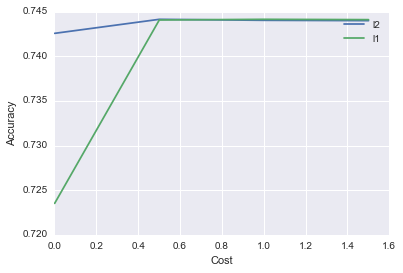

In [40]:
costs = np.arange(0.001,2,0.5)

l2s = []
l1s = []
for i in costs:
    for j in ['l1','l2']:
        lr2 = LogisticRegression(penalty = j, C = i)
        accuracies = np.average(cross_val_score(lr2, scl.fit_transform(X_train), y=y_train, cv=cv_object, verbose= 0))
        if j == 'l1':
            l1s.append(accuracies)
        else:
            l2s.append(accuracies)
# best accuracy @ cost of zero (max reg for logit) using l2 regularlization
plt.plot(costs, l2s)
plt.plot(costs, l1s)
plt.legend(['l2','l1'])
plt.ylabel('Accuracy')
plt.xlabel('Cost')
plt.show()

75% on our training set is not great, but it's better than random selection. That being said, we can definitely tune our model to understand how regularlization can help (or hinder) our classifier accuracy. It looks as if L1 penalty is our optimal parameter setting for our training set. This will give us sparseness in our parameters, allowing us to simplify our model moreso than L2. However, we need to first use our validation set to confirm our findings. 

First, let's take a look at our accuracy rate again, this time using five fold stratified cross validation and the number of observations in our data set. Let's look at our learning curve and the variability associated with our training and validation sets:
<a id='traintest'></a>

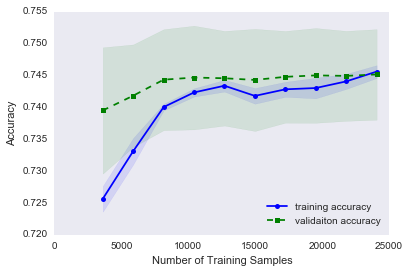

In [41]:
from sklearn.learning_curve import learning_curve 

pipe_lr = Pipeline([('scl', StandardScaler()),('clf', LogisticRegression(penalty='l1', C=0.01))]) # set up pipeline
                                                                                          # automatically scale
train_sizes, train_scores, valid_scores = learning_curve(estimator=pipe_lr, 
                                                         X = X_train, 
                                                         y = y_train, 
                                                         train_sizes = np.linspace(0.15, 1.0, 10),# spacing of samples 
                                                         cv = 10, # 10 fold stratified cross validation
                                                         n_jobs = -1) # parallelize

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.plot(train_sizes, train_mean, c='blue', marker='o',  markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
plt.plot(train_sizes, valid_mean, c='green', marker='s', linestyle='--',  markersize=5, label='validaiton accuracy')
plt.fill_between(train_sizes, valid_mean + valid_std, valid_mean - valid_std, alpha=0.1, color='green')

plt.grid()
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


[Back to Lab 2!](#Lab2)

What we can see is that we do not generalize well to our validation set in our training data when the number of samples is low -- we see high variance and overfitting. Validation accuracy lags behind training accuracy slightly until higher sample ranges are attained. There is better generalization with a larger number of samples. As expected, the validation result does have a higher variance in this case, but in general, more samples benefits the accuracy of our model. 

Let's tune the critical hyperparameters of our Logistic Regression model: regularlization cost and penalty. We'll interactively test the parameters below and then visualize optimal cost and penalties for our dataset.

In [42]:
from ipywidgets import widgets as wd
from sklearn.metrics import roc_curve

def lr_explore(cost, penalty):
    lr = LogisticRegression(penalty=penalty, C=cost, class_weight=None) 
    accuracies = cross_val_score(lr, scl.fit_transform(X_train), y_train, cv=cv_object) 
    print 'Average Accuracy:', np.average(accuracies)
    
wd.interact(lr_explore, cost=(0.001,10.0,0.05), penalty =['l1','l2'])

Average Accuracy: 0.744061050178


<function __main__.lr_explore>

After confirming l1 penalty with a large amount of regularlization is optimal for fitting our model let's take a look directly at a visual of our regularlization parameter C:

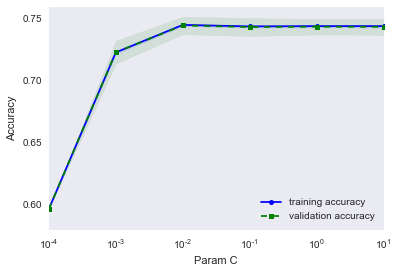

In [43]:
# take a look at C levels and associated accuracy on a stratified 10 fold CV
from sklearn.learning_curve import validation_curve

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]
train_scores, valid_scores = validation_curve(
                                             estimator = pipe_lr,
                                             X = X_train,
                                             y = y_train,
                                             param_name = 'clf__C', # vary the C parameter directly
                                             param_range = param_range,
                                             cv = 10
                                             )
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
valid_mean = np.mean(valid_scores,axis=1)
valid_std = np.std(valid_scores, axis=1)
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5,label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha = 0.1, color='blue')
plt.plot(param_range, valid_mean, color='green', marker='s', linestyle='--', markersize=5,label='validation accuracy')
plt.fill_between(param_range, valid_mean + valid_std, valid_mean - valid_std, alpha = 0.1, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Param C')
plt.ylabel('Accuracy')
plt.show()


With a large amount of regularlization, we can see that our validation and training sets are almost identical. This indicates we are NOT overfitting our model with a significant C hyperparameter using an L1 Penalty. Therefore, it's optimal we move forward with l1 and 10^-2 (0.01) regularlization term, which is a significant amount of regularlization in this case, but results in the highest accuracy for our logistic regression classifier.

Note: sklearn's C parameter is an INVERSE regularlization parameter for logistic regression, the lower, the MORE regularlization in the model.

Now, let's repeat our cross fold validation on our training set to see if we've improved based on our research.

In [44]:
lr_final = LogisticRegression(penalty='l1', C=0.01)
accuracies = cross_val_score(lr_final, scl.fit_transform(X_train), y_train, cv=cv_object) 
print np.average(accuracies)
print accuracies

0.745146043491
[ 0.7295174   0.74672652  0.75009353  0.74635241  0.74485597  0.73849607
  0.73887018  0.7523382   0.75046764  0.75374251]


A very slight improvement. Now that we've performed model selection on our training set by dividing it into subtraining and validation sets, let's fit the entire training set and take a look at our coefficients.

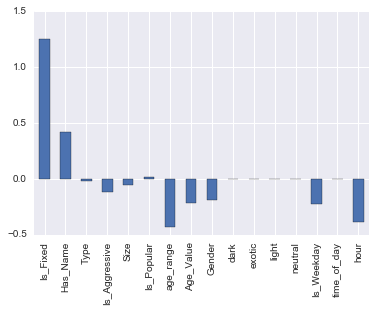

In [45]:
lr_final.fit(scl.fit_transform(X_train),y_train)
weights = pd.Series(lr_final.coef_[0], index= df_alg.columns[:-1])
weights.plot(kind='bar')
plt.show()
# L1 regularlization results show we can eliminate pretty much everything outside of is_fixed, age_range, has_name,
# and hour


## Interpreting Logistic Regression Weights

Even though our model is only around 74% accurate on our validation dataset, we have obvious opportunities to simplify. The standardized data has resulted in a sparse coefficient array for our Logistic Regression model. This is one of the main benefits of utilizing an L1 regularlized approach. 

Is_Fixed (1.36) is obviously the most important attribute in determining whether or not an animal is adopted. If an animal is fixed, it's more likely to be adopted. Age (-.64), as well, is quite important. The younger, the more likely to be adopted.

These variables, from experience and domain knowledge, were expected to be highly important. Spaying and neutering is cost prohibitive for some consumers, and the average adoptor is almost always interested in younger animals. Further, most owners do no want animals who are capable of reporoducing. Age is important because of potential health risks and maximum anticipated time with the animal. However, these assumptions are purely anecdotal and would need to be tested themselves. That being said, the ultimate conclusion given the result above is not surprising. 

What is interesting, however, is the lack of importance when it comes to size. This could be a result of the binarization process, in which size categories were created and may need to be revisited. 

The business result confirms our initial suspicions: fix the animals, name them and make them available on the weekend to maximize the chance of adoption. Our business partners cannot do anything about age.

The analytical result allows us to move forward with a two feature model, including age_range and Is_Fixed. 

In [46]:
X_reduced = df_alg[['Is_Fixed','age_range']].values
lr_reduced = LogisticRegression(penalty='l1', C=0.01)
accuracies = cross_val_score(lr_final, scl.fit_transform(X_train), y_train, cv=cv_object)
print(np.average(accuracies))

0.745108618341


In [47]:
from  matplotlib.colors import ListedColormap # credit: Sebastian Rauschka: Python Machine Learning
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02, show_pts=None, categorical=None):
    # set up marker generator and color map
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    
    # plot decision surface
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() +1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() +1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.c_[xx1.ravel(),xx2.ravel()])
    
    Z = Z.reshape(xx1.shape)
    plt.figure(figsize=(10,5))
    plt.contourf(xx1, xx2,Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot all samples
    if categorical:
        X = np.random.normal(X, np.abs((xx1.max() - xx2.max())) * 0.05)
        
    if show_pts and categorical:
        #for idx, cl in enumerate(np.unique(y)):
            #plt.scatter(x=X[y==cl,0], y=X[y==cl,1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl)
        plt.scatter(x=X[:,0], y=X[:,1], c=y, cmap=cmap_bold, alpha =0.15)
        
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx,:], y[test_idx]
        plt.scatter(x = X_test[:,0],y = X_test[:,1], c='',
                    alpha=1.0, linewidths=1, marker='o',
                    s=55, label='test set')

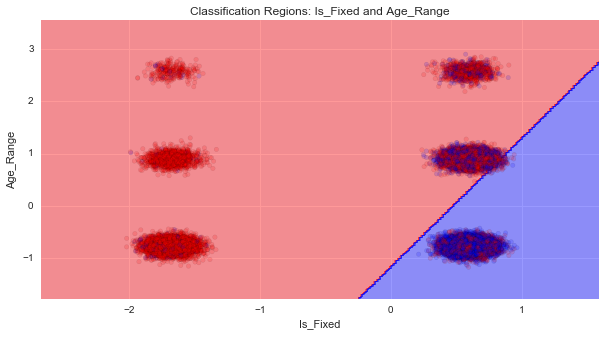

In [48]:
lr_reduced.fit(scl.fit_transform(X_reduced), y_train)

plot_decision_regions(scl.fit_transform(X_reduced), y_train, lr_reduced, categorical='Yes', show_pts='Yes')
plt.xlabel('Is_Fixed')
plt.ylabel('Age_Range')
plt.title('Classification Regions: Is_Fixed and Age_Range')
plt.legend(loc='best')
plt.show()

Our decision regions visually show that fixed, young animals are adopted. While older animals have less of a chance to be adopted, even if they are fixed. 

We still maintain 75% accuracy, after reducing the amount of features in our dataset to only two.

## Logistic Regression Conclusion

75% accuracy is much better than random chance, however, our classification model can likely be improved by gathering critical features, such as pre-existing medical conditions, if the animal has reproduced before and solidifying whether or not an animal truly is aggressive, instead of using arbitrary lists to identify aggressive breeds. We believe this would push our model accuracy over 80% and provide a more holistic conclusion on what factors drive adoption for our business partners.

Further, using the actual age instead of a categorical age level may provide us with additional accuracy. We will attempt this methodology with a support vector machine. However, other methodologies and additional variables may prove to be the most benefit for increasing accuracy.

<a id='SVM'></a>
# Support Vector Machine

Now let's take another route: support vector machines. We will fit both linear and non-linear support vector machines to the data and compare this methodology with logistic regression.

Support Vector Machines try to maximize the margin of the closest observations to the linear decision boundary in order to classify instances. In this case, we are still attempting to classify an animal as adopted or not, while also providing descriptive analysis on the most important features of the dataset.

We will also add the actual age value back into the model. There is definite collinearity expected by including age_range and age_value, however, we will be able to easily determine which feature is most important after model selection.

In [49]:
from sklearn.linear_model import SGDClassifier as SGD

First, let's try a linear kernel, out of the box, to get baseline performance before we start tweaking hyperparameters. We will use the same shufflesplit cross validation technique, using 80% of our training data as a training set, and 20% of our training data as a validation set.

In [50]:
# reset data
y_train = df_alg.values[:,-1]
X_train = df_alg.values[:,:-1]

In [51]:
# commenting these out as they take quite some time to run, mini lab previously turned in ran them
from sklearn import svm
#clf = svm.SVC(kernel = 'linear')
#%timeit accuracies = cross_val_score(clf, scl.fit_transform(X_train), y_train, cv=cv_object) 
#print(accuracies)

Now, let's fit a non-linear model out of the box.

In [52]:
#from sklearn import svm
#clf = svm.SVC(kernel = 'rbf')
#%timeit accuracies = cross_val_score(clf.scl.fit_transform(X_train), y_train, cv=cv_object) 
#print(accuracies)

As seen above, accuracies for both the linear and non-linear kernel selection perform roughly the same as our logistic regression model. However, the computing performance of the model is sub-par, taking over a minute to run cross-validation.

This is a common issue with support vector machines: potential additional accuracy and outlier resistance comes at a cost of more computing time. SVMs are less sensitive to outliers when compared to Logistic Regression, however, SVMs take longer to fit and longer to validate. Logistic Regression is always preferred from a timing standpoint for well behaved datasets, such as streaming or event based data. Logistic Regression can be updated more easily and more timely. However, when datasets are non-linear, we need to relax linear assumptions. In these cases, kernel SVM accuracy is superior most of the time.

That being said, we have options in sklearn, using a stochastic implementation of SVM called SGDClassifier. Let's take this module for a spin and perform model selection.

In [53]:
tst = SGD(loss='hinge', n_iter=200) # this is a linear SVM classifier
%timeit accuracies = cross_val_score(tst, scl.fit_transform(X_train), y_train, cv=cv_object) 
print(accuracies)
print(np.average(accuracies))

1 loop, best of 3: 3.85 s per loop
[ 0.7295174   0.74672652  0.75009353  0.74635241  0.74485597  0.73849607
  0.73887018  0.7523382   0.75046764  0.75336826]
0.745108618341


Thankfully, our SGDclassifier performs better from a timing perspective. Let's perform model selection techniques to see how we can tweak cost. We already know the more samples we use, the better, so let's focus on the hyerparameters, first by allowing adjustment of alpha (cost) and penalty, and then a more complicated visualization of alpha levels and the four different levels of penalty in the SVM linear model.

In [54]:
def svm_explore(alpha, penalty):
    clf = SGD(loss='hinge',penalty=penalty, alpha=alpha, n_iter=200) 
    accuracies = cross_val_score(clf, scl.fit_transform(X_train), y_train, cv=cv_object) 
    print 'Average Accuracy:', np.average(accuracies)
    
wd.interact(svm_explore, alpha=(0.0001,10.0,0.05), penalty =['none','l1','l2','elasticnet'])

Average Accuracy: 0.654719209169


<function __main__.svm_explore>

Using a stratified 10 fold cross validation, let's take a look at our validation curve:

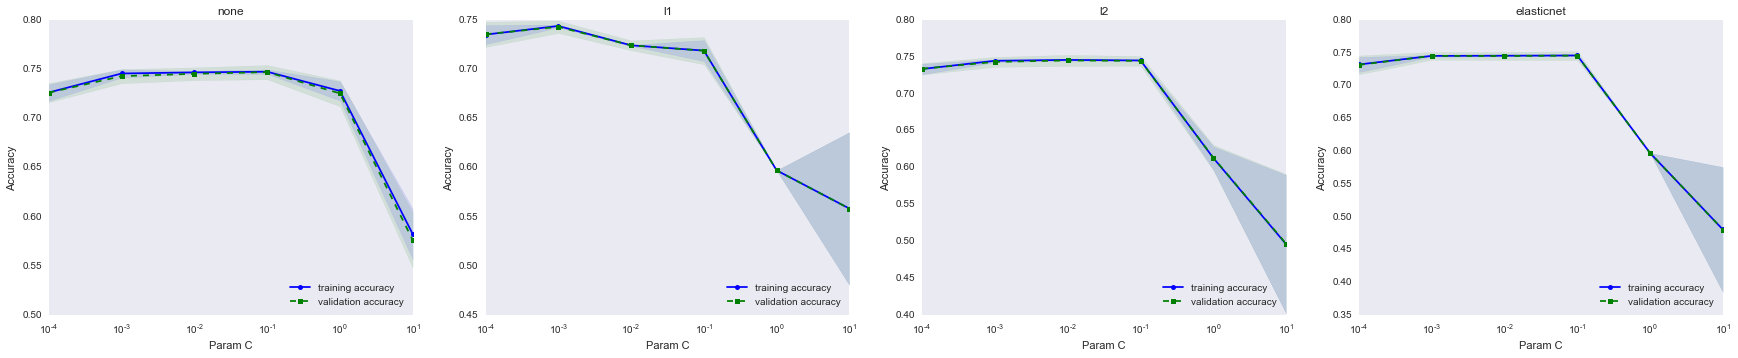

In [55]:
plt.figure(figsize=(30,18))
for idx, i in enumerate(['none','l1','l2','elasticnet']):
    plt.subplot(3,4,idx+1)
    pipe_svm = Pipeline([('scl', StandardScaler()),('clf', SGD(penalty=i,n_iter=20,n_jobs=-1,learning_rate='optimal'))])
    train_scores, valid_scores = validation_curve(
                                                 estimator = pipe_svm,
                                                 X = X_train,
                                                 y = y_train,
                                                 param_name = 'clf__alpha', # vary the C parameter directly
                                                 param_range = param_range,
                                                 cv = 10
                                                 )
    train_mean = np.mean(train_scores,axis=1)
    train_std = np.std(train_scores,axis=1)
    valid_mean = np.mean(valid_scores,axis=1)
    valid_std = np.std(valid_scores, axis=1)
    plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5,label='training accuracy')
    plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha = 0.1, color='blue')
    plt.plot(param_range, valid_mean, color='green', marker='s', linestyle='--', markersize=5,label='validation accuracy')
    plt.fill_between(param_range, valid_mean + valid_std, valid_mean - valid_std, alpha = 0.1, color='green')
    plt.grid()
    plt.xscale('log')
    plt.legend(loc='lower right')
    plt.xlabel('Param C')
    plt.ylabel('Accuracy')
    plt.title(i)
plt.show()

Even with a stoachastic approach, we are getting better performance and less overfitting. The l2 norm penalty looks to be the most optimal, with roughly 75% accuracy at a cost of 0.1 in our 10 fold cross validation. In the SVM case, cost is not inverse. Our regularlization increases as the alpha parameter increases, reducing the size of our coefficients. 

Speaking of coefficients, let's take a look at the coefficients for our SVM model given the parameters we've now tuned for the entire training set:

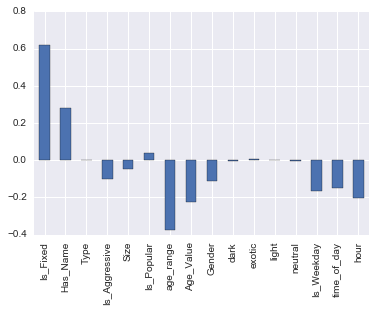

In [56]:
svm_final = SGD(loss='hinge', alpha=0.1, learning_rate='optimal', penalty='l2',n_jobs = -1, n_iter=20)
svm_final.fit(scl.fit_transform(X_train),y_train)
weights = pd.Series(svm_final.coef_[0], index=df_alg.columns[:-1])
weights.plot(kind='bar')
plt.show()

Our result tells roughly the same story: Is_Fixed and age_range dominate the standardized coefficient rates. Let's take a look at a reduced model to understand how accurate our model is using an 80/20 stratified shuffle split with 5 splits.

In [57]:
X_reduced = df_alg[['Is_Fixed','age_range']].values

svm_reduced = SGD(loss='hinge', alpha= 0.1, learning_rate='optimal', penalty='l2',n_jobs = -1, n_iter = 20)
accuracies = cross_val_score(svm_reduced, scl.fit_transform(X_reduced), y_train, cv=cv_object) 
print 'Average Accuracy:', np.average(accuracies)


Average Accuracy: 0.724082656796


Our reduced model performs roughly similar, if not slightly worse, than the logistic regression reduced model above. Removing age_value as a redundant attribute is a good idea as these two attributes are collinear. Now that we've fitted a linear SVM to our dataset, let's use the SVC method to take a look directly at our support vectors for the entire training set now that we've selected our model:

In [58]:
svm_reduced = svm.SVC(kernel = 'linear', C = 0.1)
svm_reduced.fit(scl.fit_transform(X_reduced), y_train)
print accuracy_score(svm_reduced.predict(scl.fit_transform(X_reduced)),y_train)

0.724082457256


In [59]:
print svm_reduced.support_vectors_.shape
print svm_reduced.n_support_
print svm_reduced.coef_
print svm_reduced.support_

(15506L, 2L)
[7753 7753]
[[ 0.88077732 -1.19965611]]
[    0     1     7 ..., 26721 26723 26726]


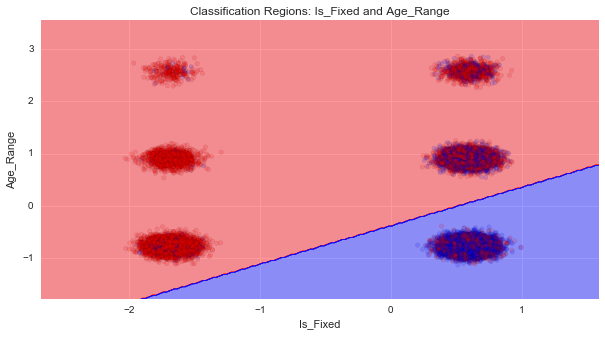

In [60]:
plot_decision_regions(scl.fit_transform(X_reduced), y_train, svm_reduced, categorical='Yes', show_pts='Yes')
plt.xlabel('Is_Fixed')
plt.ylabel('Age_Range')
plt.title('Classification Regions: Is_Fixed and Age_Range')
plt.legend(loc='best')
plt.show()

Our decision regions show clearly that fixed, young dogs are adopted. The region is slightly softer than the logistic regression decision regions however, as age_range has more of an influence on the classifier in our SVM model, there is not as sharp of a cut off with is_fixed in the SVM model as there is in the logistic regression model. Linear SVM struggles with classifying adult, fixed dogs moreso than does our logistic regression model. That being said, both models tell the same story. Young animals that are fixed get adopted.

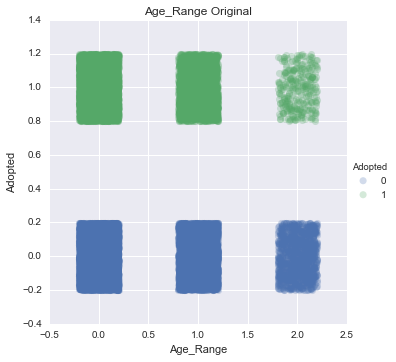

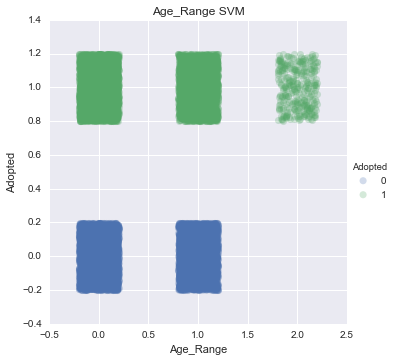

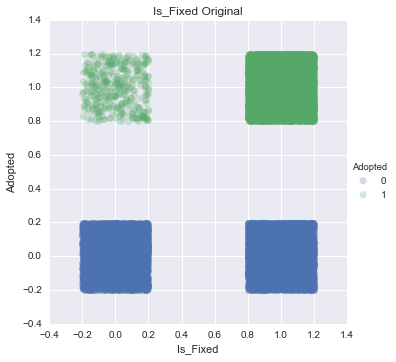

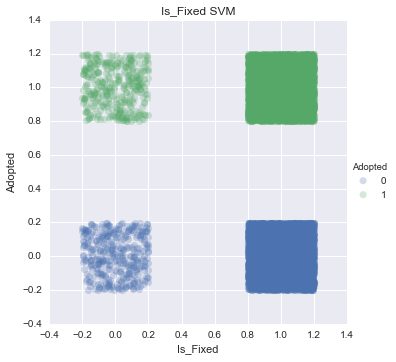

In [61]:
df_alg['Adopted'] = df_alg['Outcome_Label']
df_alg['Age_Range'] = df_alg['age_range']
df_support = X_reduced[svm_reduced.support_]
df = pd.DataFrame(df_support, columns=[['Is_Fixed','Age_Range']])
df.insert(2,'Adopted',y_train[svm_reduced.support_])

#seaborn doesnt work well with subplots...maybe a future enhancement, apologies for stacking here

for i in ['Age_Range','Is_Fixed']:
    sns.lmplot(i, "Adopted", data=df_alg, hue = 'Adopted', x_jitter=.2, y_jitter =.2, fit_reg=False, 
               scatter_kws={"s":50, "alpha":0.25})
    plt.title(i + ' Original')
    sns.lmplot(i, "Adopted", data=df, hue = 'Adopted', x_jitter=.2, y_jitter =.2, fit_reg=False,
              scatter_kws={"s":50, "alpha":0.25})
    plt.title(i + ' SVM')
    plt.show()


Even though our data is highly categorical, these jointplots show the obvious effect of our support vectors. Our age range above shows that older animals are not adopted. They do not define our SVM support vectors for animals that were not adopted. Essentially, the SVM model is able to classify our 'negative' level, not adopted, if the animal is a senior. Further, less support vectors are needed to classify dogs as not adopted when they are not fixed in the SVM model when compared to the original data. As shown in the decision region above, in our simplified model, it looks as though age range has more importance. Indeed, it's coefficient is -1.19 to Is_Fixed's .89.

## Mini Lab - Conclusion

Even though we've already addressed the pros and cons of each model, we would likely choose to use the support vector machine to classify our model. This is because our clients require a one time analysis and data discovery. They do not need ongoing, on-demand modeling needs. Further, our SVM model is more resistant to outlier data. Even though our data is highly categorical, we could potentially add more continuous variables in the future.

This decision comes at the detriment of computing performance. The SVM model is not fast while the logistic regression model is very quick. However, as we try to maximize our likelihood in the logistic regression model, we maximize margin in the support vector machine. This allows us to be more confident that new data will not negatively affect performance as much as if we've used the logistic regression approach.

Both models offer easy interpretation for our clients and both tell the same story. The SVM model affords us a bit more accuracy, but not much. Additional features, as explained previously, will be critical to increasing accuracy. Further, splitting our model into dog and cat versions could afford accuracy increases as well.

<a id='Lab2'></a>
# Lab 2 Start

Now that we've identified Linear SVM and Logistic regression learners perform relatively similarly when classifying the outcome of adopted or not, let's try two new learners: KNN and a simple decision tree, and combine them into an ensemble learner on our full dataset. We will choose to leave out our SVM learner here, as it performed slightly worse than logistic regression and took much more time to train.

We'll build a stacked ensemble model with a majority voting classifier as our meta learner. This stacked approach is expected to give us some more benefit than our single classifiers.

However, first, let's exhaustive grid search for the most optimal classifier hyperparameters for our K-Nearest Neighbors. Specifically, we want to test three different parameters: the number of neighbors, the distance measure and the weighting method for our distance measure. KNN performs poorly on high dimensional datasets, however, given our dataset in its current state with 16 features and one target, we feel comfortable at least attempting KNN. 

As we will not be re-running the grid search algorithm, we'll go ahead with a brute force search one time in order to avoid missing any optimal combinations.

## Data Preparation and Feature Engineering

Given extensive feature engineering and data cleaning in previous sections ([Feature Engineering](#clean)) and algorithmic setup ([Algorithmic Setup](#setup)), our dataset is fully clean and ready to use in learners. Because we will be using pipelines, scaling will happen depending on the learner's requirements. For instance, training data will be scaled for KNN and not for decision trees. 

All extraneous data has been removed and valid features have been one hot encoded, binarized or ordinalized where appropriate in the dataframe <b>df_alg</b>.

What we saw from our previous logistic regression and support vector machine analysis is that Is_Fixed and Age_Range are our most important features, and can perform nearly as well by themselves rather than using the entire dataset.

However, given we are going to be exploring additional learners and classifiers in this exercise, we will move forward with the full, cleaned dataset.

Our cleaned dataset looks like the following:

In [62]:
df_alg.head()

,Is_Fixed,Has_Name,Type,Is_Aggressive,Size,Is_Popular,age_range,Age_Value,Gender,dark,exotic,light,neutral,Is_Weekday,time_of_day,hour,Outcome_Label,Adopted,Age_Range
0,1,1,1,0,1,0,0,365,1,0,0,0,1,1,0,2,0,0,0
1,1,1,0,0,0,0,0,365,0,0,0,1,0,0,2,19,0,0,0
2,1,1,1,1,2,0,1,730,1,0,0,1,0,0,2,20,1,1,1
3,0,0,0,0,0,0,0,21,1,0,0,1,0,0,0,2,0,0,0
4,1,0,1,0,0,1,1,730,1,0,0,0,1,1,2,20,0,0,1


From our feature engineering and data cleaning process, we created many new, valuable features. In fact, our original feature set contained 9 variables. We have removed two unimportant features and created an additional six features. We will list the full complement of these features below with a brief explanation of their purpose:

    1. Is_Fixed: Binary feature indicating whether or not (0) the animal is spayed or neutered (1)
    2. Has_Name: Binary feature indicating whether or not (0) the animal has a name prior to outcome (1)
    3. Type: Another binary feature indicating dog (0) or cat (1)
    4. Is_Aggressive: Binary feature indicating if the animal has an aggressive reputation (1) or not (0)
      4a. The aggressive indicator is derived from: http://www.therichest.com/rich-list/the-biggest/the-worlds-10-        most-dangerous-dog-breeds/?view=all
    5. Size: An ordinal feature in the range of [0,3] indicating small (<20lbs), medium (<=50lbs), large(<=100lbs) and giant (100+lbs)
    6. Is_Popular: Binary feature indicating whether or not the animal is on a top 10 popularity list
    7. Age_Range: Ordinal feature in the range of [0,2] indicating young(<= 1yr), adult (<=8 yrs), senior  (>8 yrs)
    8. Age_Value: Continuous ratio variable indicating the age in days of the animal
    9. Gender: Binary variable indicating male (0) or female (1)
    10. Color: nominal variables one hot encoded into dark, exotic, light, neutral features
    11. Is_Weekday: Binary feature indicating if the day of the outcome happened on a weekday (0) no (1) is yes
    12. Time_Of_Day: Ordinal feature indicating morning (0), afternoon (1), evening (2) when outcome occurred
    13. Hour: Interval feature with a range of [0,23] indicating the hour of the day when outcome occurred
 
 Unimportant variables such as the animal ID and the outcome subtype, which was extremely sparse, have been removed from the final dataset before learning occurs.
 
 While this final dataset is not optimal, it is as complete as we can make it given the base data retrieved. Other important features like an indication of the animal's health and a confirmation of aggressive history would be extremely valuable. However, given the final dataset, we are comfortable we'll be able to provide valuable analysis to our business partners. We are also confident that our learners will produce classifiers that are much better than chance. 


## Test Set Selection and Validation Strategy


For this go-round, we will be far more explicit with our training and testing splits. Our test set will be partitioned off from our dataset completely. To do this, an 80/20 split will be performed as this is normally a good rule of thumb, especially at 20,000+ samples with class distributions that are roughly 40% adopted and 60% not adopted. Critically, an 80/20 split just so happens to perform well based on our learning curve ([See Learning Curve](#traintest)) for the logistic regression classifier. We are able to control overfitting effectively on our training data at around 17,000 observations. Since there are roughly 27,000 observations in our entire dataset, we feel comfortable using 5,400 observations as our test set, which is 20% of the entire animal shelter outcomes dataset. This will give our classifiers even more training data to work with for model selection and fitting. 

From there, we will perform model selection via 10 fold stratified cross-validation on our training data. 10 folds will provide us with a better, larger training set for estimation, effectively decreasing our estimate bias. Our dataset is not too large that computing performance will be significantly hampered, so the size of our folds is not of a concern from a performance perspective. Given empirical evidence of bias and variance trade off at 10 folds, we also feel comfortable using 10 folds.

Further, k-fold cross validation resamples without replacement, ensuring each observation of our data will be used as part of a training and test set exactly once. As a result, k-fold cross validation will provide us with a lower variance estimate of our model performance. Remembering we've separated off our test set completely and will not look at it until we feel comfortable with our classifier and hyperparameter performance on our cross validated training data. We will use our test dataset only one time.

To ensure class distributions are kept stable and our estimate bias and variance is further controlled, stratification will be used to create our test dataset as well as to cross validate training data during model selection. Our total dataset is roughly 60% not adopted and 40% adopted. Therefore, our test set should match the distribution of the data in order to ensure our outcomes are as realistic as possible prior to testing the generalization capabilities of our classifiers.

Once we are comfortable with our generalization estimates via stratified ten fold cross validation, we will determine our generalization effectiveness on our test data set.


## Evaluation Metrics

Evaluation metrics should consider business goals before being set to judge model effectiveness. Because our clients are a no kill organization, we are not considering minimizing our false negatives. For instance, if we predict adoption and a pet is actually not adopted (transferred instead, for instance), we do not need to worry about the animal being euthanized. Euthanization is held only for extremely sick or aggressive animals.

Therefore, we want to maximize our true positive rate, ensuring that adoption is a sure thing if it's predicted in order to maximize the amount of animals adopted, which is our client's primary goal. We will do this by judging the AUC, or area under curve as part of an overall Receiver Operating Characteristic (ROC) curve. The ROC will visualize  the trade off between true positive and false positive rates. It will also allow interpretation of the true positive rate based on given thresholds, allowing the business to give feedback on the false positive rates they are willing to accept in the model while attempting to maximize true positive rates. Our classes are also slightly unbalanced, so ROC and ROC_AUC will give us a less biased estimate of the performance of our model based on business goals previously described.

Another huge benefit of using the ROC curve and ROC_AUC is interpretability. Our clients will be able to understand that an AUC of 0.9 is larger than an AUC of 0.5, and therefore the prior model, for all intents and purposes, is likely a better choice when combined with visual inspection. This latter point is critical, and is the reason we choose to visualize the ROC curve, as AUC by itself can be misleading. We can give an overall score, but the True Positive rates may trade off too high of a false positive rate for our partners. Therefore, the visual is critical for optimal decision making.

We will also judge the accuracy of our model overall, to determine how well we are classifying our test set. Because we have a binary classification situation where classes are not severely asymmetric, we expect accuracy to give us a good feedback mechanism on the overall performance of our model.


<a id='task1'></a>
## Classification Task 1: Outcome 
### Learner Choices and Hyperparameter Tuning

For our first classification task, we'll use our logistic regression model, which performed at ~75% accuracy, along with two new learners: a decision tree and K-Nearest Neighbors classifier. Outcome is our target for our first classification task, which is binary. 

A decision tree and KNN will allow us to learn more complex decision boundaries, however, at the risk of potentially overfitting, so we'll need to model search using our chosen cross validation approach: stratified 10 fold cross validation.

Even though standard KNN is less effective in high dimensions, our KNN learner should work relatively well with the amount of features in our feature set (13), given 20,000 + observations. One drawback of our KNN model will obviously be calculation time, however, given this is a batch exercise, we are not worried about calculation time. We'll also need to be highly aware of irrelevant attributes. For instance, we'll keep an eye on our time attributes such as hour and time of day, as they are obviously correlated and thus could affect the model. We don't believe these features are irrelevant, however. 

Let's jump in and take a look:


## K Nearest Neighbors

In [63]:
from sklearn.cross_validation import train_test_split # split off part of training for our test set
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

clf1 = LogisticRegression(penalty='l2', C=0.001, random_state=0) # optimized in mini lab with ~74.5% accuracy

del df_alg['Adopted'] # delete extraneous labels used for visualization purposes in minilab
del df_alg['Age_Range']

In [64]:
# let's formally create a test set from our training data, kaggle does not have a test set posted yet as competition
# has not concluded, taking care to stratify our training and testing set as well as our model search process.

X = df_alg.iloc[:,:-1]
y = df_alg.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)

cv_object = StratifiedKFold(y=y_train, n_folds=10)

We're going to take more efficient approach to model selection: GridSearch. There are sampling methods for GridSearch that would be much faster, however, we will be testing multiple parameters. A brute force approach will ensure that we find the parameters that maximize our metrics: accuracy and roc_auc for K Nearest Neighbors. 

This method of model selection will save us enormous amounts of time in our model selection process, albeit it may not be the most optimal computationally, again we are solving a one time problem. We can take our time.

Let's investigate KNN first via GridSearch on a validation set using stratified 10 fold cross validation. Rule of thumb for KNN is typically the square root of the number of observations to determine our neighbor range. We'll test a range of 80 to 150 neighbors, along with cityblock and euclidean distances and neighbor weighting of uniform and distance:

In [65]:
clf3 = KNeighborsClassifier(metric='minkowski', n_jobs=-1)

params = {'n_neighbors': np.arange(10,100,20), 'weights':['uniform', 'distance'], 'p':[1,2]}
# subclass the gridsearchcv and overwrite the functions 
grid_acc = GridSearchCV(estimator=clf3, param_grid=params, cv=cv_object, scoring='accuracy', n_jobs=-1)
grid_roc = GridSearchCV(estimator=clf3, param_grid=params, cv=cv_object, scoring='roc_auc', n_jobs=-1)
grid_acc.fit(scl.fit_transform(X_train), y_train)
grid_roc.fit(scl.fit_transform(X_train), y_train)

print 'best accuracy score: %s, best parameters: %s'%(grid_acc.best_score_, grid_acc.best_params_)
print 'best auc score: %s, best parameters: %s'%(grid_roc.best_score_, grid_roc.best_params_)

best accuracy score: 0.762802226067, best parameters: {'n_neighbors': 50, 'weights': 'uniform', 'p': 1}
best auc score: 0.844006870366, best parameters: {'n_neighbors': 30, 'weights': 'uniform', 'p': 1}


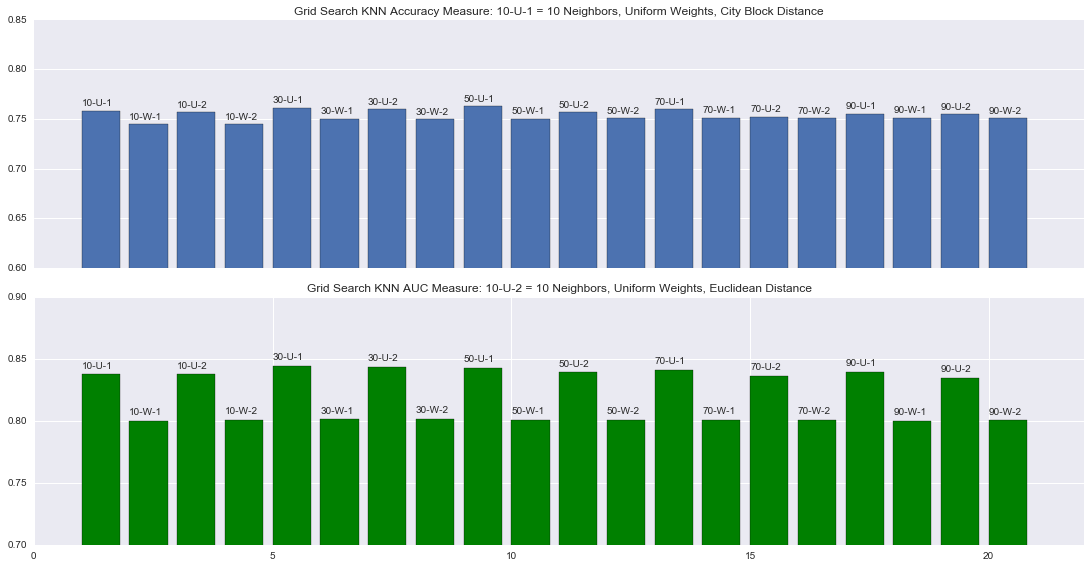

In [66]:
x_lab = ['10-U-1','10-W-1','10-U-2','10-W-2',
        '30-U-1','30-W-1','30-U-2','30-W-2',
        '50-U-1','50-W-1','50-U-2','50-W-2',
        '70-U-1','70-W-1','70-U-2','70-W-2',
        '90-U-1','90-W-1','90-U-2','90-W-2']

c = 0 # simple sentry var to loop through x labels
x = range(1,len(grid_acc.grid_scores_)+1)
y = pd.DataFrame(grid_acc.grid_scores_)['mean_validation_score'].values


fig = plt.figure(figsize=(30,8))
ax1 = fig.add_subplot(221)
plt.title('Grid Search KNN Accuracy Measure: 10-U-1 = 10 Neighbors, Uniform Weights, City Block Distance')
plt.ylim(.6,.85)
plt.xlim(0,22)
ax1.bar(x,y)
ax1.set_xticks([])
for a,b in zip(x,y):
    ax1.text(a,b+0.005,x_lab[c])
    c+=1
c = 0


y = pd.DataFrame(grid_roc.grid_scores_)['mean_validation_score'].values
ax2 = fig.add_subplot(223)
plt.title('Grid Search KNN AUC Measure: 10-U-2 = 10 Neighbors, Uniform Weights, Euclidean Distance')
plt.ylim(.7,.9)
plt.xlim(0,22)
ax2.bar(x,y, color='green')
for a,b in zip(x,y):
    ax2.text(a,b+0.005,x_lab[c])
    c+=1
    
plt.tight_layout()
plt.show()


Based on our grid search across our training set with 10 fold stratified cross validation, ROC AUC and accuracy are nearly identical from an optimal nearest neighbors perspective from 30 to 90 neighbors. Further, both grid search jobs agree on uniform weight and city block distance as optimal parameters. 

These evaluation measures fluctuate depending on sampling and our nearest neighbors validity would be roughly the same between 30 and 90 neighbors. This is confirmed in the bar chart above, which visualizes each grid search run result for accuracy and AUC across each parameter permutation in the KNN model. The margin of gain over the other runs using cityblock distance and uniform weights is not substantial. 

However, less neighbors means less calculation time, but potentially more overfitting. 

A very rough, general rule of thumb for number of neighbors is the square root of the number of observations, which would be 146 neighbors. However, our GridSearch indicates a much lower number of neighbors is the most optimal.

Let's investigate if we're overfitting directly via a validation curve using accuracy and our KNN fit and make a final decision on our number of neighbors to use in our learner:

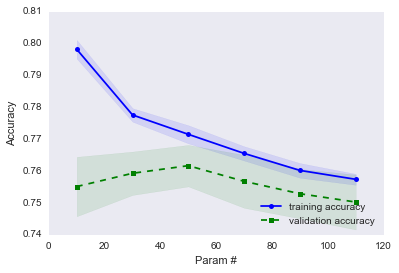

In [67]:
# Let's set up a pipeline to make things a bit easier to work with

clf3 = KNeighborsClassifier(metric='minkowski', p=1, weights='uniform', n_jobs=-1)
pipe3 = Pipeline([['sc', StandardScaler()], ['clf3', clf3]]) # set up a pipe to standardize KNN


param_range = [10,30,50,70,90,110] 

def fit_check(est, param, rng):
    train_scores, valid_scores = validation_curve(
                                                  estimator = est,
                                                  X = X_train,
                                                  y = y_train,
                                                  param_name = param,
                                                  param_range = rng,
                                                  cv = 5
                                                 )
    train_mean = np.mean(train_scores,axis=1)
    train_std = np.std(train_scores,axis=1)
    valid_mean = np.mean(valid_scores,axis=1)
    valid_std = np.std(valid_scores, axis=1)
    plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5,label='training accuracy')
    plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha = 0.1, color='blue')
    plt.plot(param_range, valid_mean, color='green', marker='s', linestyle='--', markersize=5,label='validation accuracy')
    plt.fill_between(param_range, valid_mean + valid_std, valid_mean - valid_std, alpha = 0.1, color='green')
    plt.grid()
    plt.legend(loc='lower right')
    plt.xlabel('Param #')
    plt.ylabel('Accuracy')
    plt.show()

fit_check(pipe3, 'clf3__n_neighbors', param_range)

In [68]:
clf3.get_params # clf3 reset to 110 from validation curve, need to reset back

<bound method KNeighborsClassifier.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=110, p=1,
           weights='uniform')>

There is definitely some overfitting happening at 30 neighbors, however, the difference is only 2.5% from an accuracy standpoint, which is relatively minor. Notice, at 10 neighbors, we are overfitting our training data severely. As noticed above in our metrics barcharts, neighbors between 30 and 90 are nearly identical, however, 90 seems to minimize overfitting better than 30. Therefore, conservatively, we'll choose 90 neighbors.

Further, we made sure to scale attribute values in our learner for KNN, as we do not want age_value to drown out the binary or categorical features in our dataset. 

With previously accuracies hanging around 74-75% for SVM and Logistic Regression, let's quickly take a look at how our KNN performs at 90 nearest neighbors as part of a scaled pipeline for both accuracy and ROC AUC on our test set. We scale our features to ensure age_value does not drown out our binary and ordinal features:

In [69]:
from sklearn import metrics

clf3 = KNeighborsClassifier(metric='minkowski', p=1, n_neighbors=90, weights='uniform', n_jobs=-1)
pipe3 = Pipeline([['sc', StandardScaler()], ['clf3', clf3]]) # re-establish pipe and standardize KNN

pipe3.fit(X_train, y_train)

print accuracy_score(pipe3.predict(X_test), y_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, pipe3.predict_proba(X_test)[:,1])
print metrics.auc(fpr, tpr)


0.755331088664
0.840176186171


In [70]:
# multiple classes for AUC = one v all setup, same for ROC curve, micro and macro averaging

Our AUC dropped less than a point, however, our accuracy increased nearly two and a half points. Since AUC is not an end all be all metric and requires inspection of an ROC curve, we'll accept our accuracy increase and move forward with 90 neighbors with uniform weights and a cityblock distance. Further, we do not want to iterate over the test set, as it is bad practice and will introduce bias into our analysis.

Now, let's also take a look at our decision regions for our KNN learner, considering the top two features from previous logistic regression analysis: Is_Fixed and Age_Range:

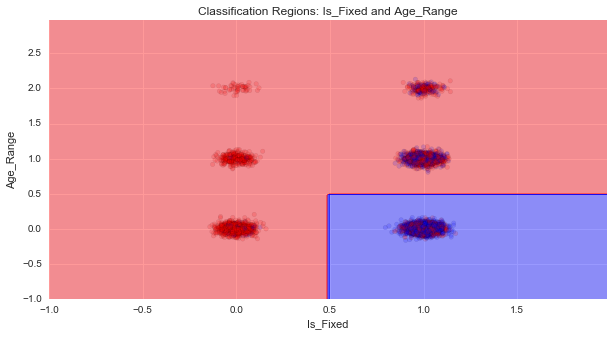

In [71]:
X_reduced = X_train[['Is_Fixed','age_range']].values
pipe3.fit(X_reduced, y_train)

plot_decision_regions(X_test[['Is_Fixed','age_range']].values, y_test, pipe3, categorical='Yes', show_pts='Yes')
plt.xlabel('Is_Fixed')
plt.ylabel('Age_Range')
plt.title('Classification Regions: Is_Fixed and Age_Range')
plt.legend(loc='best')
plt.show()

Our significant two and a half point jump in accuracy versus our previous logistic regression model with the KNN classifier at optimized hyperparameters based on our grid search is a great sign. This jump is likely to be better than previous fit from the minilab because our data is more cleanly separated in predicting adoption in the KNN case than the Logistic regression case, as seen in the decision region plot above.

From a usage standpoint, the amount of neighbors used in our KNN will prevent overfitting but still allow us more complex decision boundaries than typical logistic regression or linear SVM models. Unfortunately, or fortunately (depending on your viewpoint), our decision boundaries can't get extremely complex because most of our dataset is made up of low order categorical attributes. As seen above, our two most important features dont form an extremely complex decision boundary, however, we are 2.5% more accurate with a good AUC score of 0.78. AUC still requires investigation, which will examine shortly.


## Decision Tree

Now, let's quickly optimize our simple decision tree classifier, using depth, feature splitting, sample splits and samples per leaf as our parameter set. We do not want extraneous leaves in our tree, which will help us limit overfitting our decision tree. Further, we do not need to transform our data as in KNN because decision trees can handle different types of data scales and data types. Therefore, we will not be using a scaler here:

In [72]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
clf2 = DecisionTreeClassifier()

params = {'max_depth' : np.arange(1,10,1), 
          'min_samples_leaf' : [10,50,100,500,1000], 
          'min_samples_split' : [10,50,100,500,1000],
          'max_features' : ['sqrt','log2',None]}

grid_acc = GridSearchCV(estimator=clf2,param_grid=params,cv=cv_object,scoring='accuracy',n_jobs=-1)
grid_roc = GridSearchCV(estimator=clf2,param_grid=params,cv=cv_object,scoring='roc_auc',n_jobs=-1)
grid_acc.fit(X_train, y_train)
grid_roc.fit(X_train, y_train)

print 'best accuracy score: %s, best parameters: %s'%(grid_acc.best_score_, grid_acc.best_params_)
print 'best auc score: %s, best parameters: %s'%(grid_roc.best_score_, grid_roc.best_params_)

best accuracy score: 0.780292755928, best parameters: {'max_features': None, 'min_samples_split': 50, 'max_depth': 8, 'min_samples_leaf': 10}
best auc score: 0.869016347153, best parameters: {'max_features': None, 'min_samples_split': 50, 'max_depth': 8, 'min_samples_leaf': 10}


Our decision tree classifier performs even better than our KNN with larger than default (2) leaves, a max depth of 8 and consideration of all features upon each node split on our validation set .

Just like our KNN classifier, let's take a look at overfitting as well:

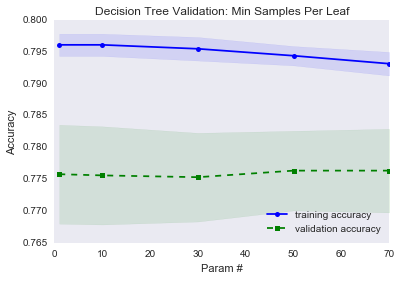

In [73]:
clf2 = DecisionTreeClassifier(max_depth=9, max_features = None, min_samples_leaf = 8)
param_range = [1,10,30,50,70]

plt.title('Decision Tree Validation: Min Samples Per Leaf')
fit_check(clf2, 'min_samples_split', param_range)

With an accuracy on our training set of ~79.5% on our training set and ~78.25% on our validation set, we're comfortable moving forward with our decision tree as there is extremely slight, if any overfitting. We'll move forward with 7 minimum samples per leaf.

Let's visualize our decision regions again with the most important features from our previous analysis:

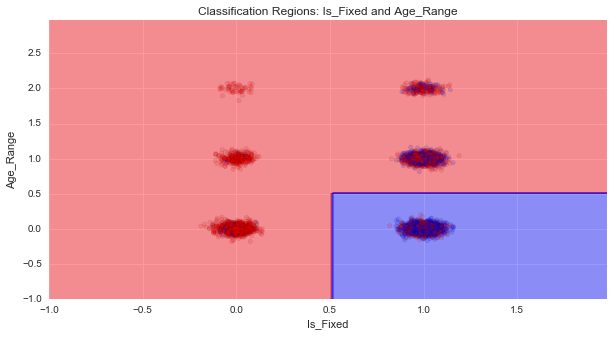

In [74]:
# fit dtree to test data
clf2 = DecisionTreeClassifier(max_depth=9, min_samples_leaf=10, max_features=None, min_samples_split=10)
clf2.fit(X_reduced, y_train)

plot_decision_regions(X_test[['Is_Fixed','age_range']].values, y_test, clf2, categorical='Yes', show_pts='Yes')
plt.xlabel('Is_Fixed')
plt.ylabel('Age_Range')
plt.title('Classification Regions: Is_Fixed and Age_Range')
plt.legend(loc='best')
plt.show()

In [75]:
clf2.fit(X_train, y_train)
print accuracy_score(clf2.predict(X_test), y_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, clf2.predict_proba(X_test)[:,1])
print metrics.auc(fpr, tpr)

0.779648335204
0.87040139811


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.825344 to fit



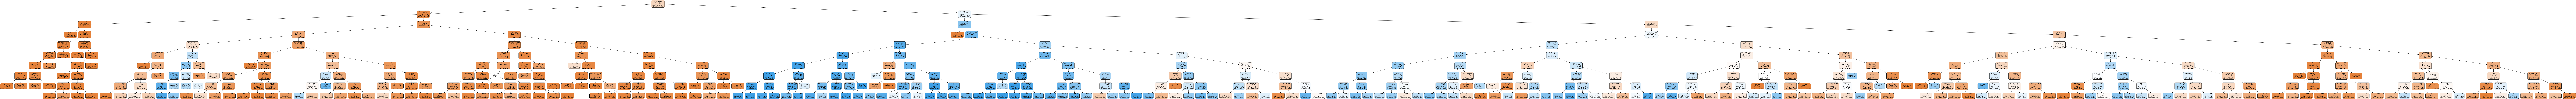

In [76]:
import pydot
import os
from sklearn.externals.six import StringIO  
from IPython.display import Image
from subprocess import check_call

dot_data = StringIO()  
export_graphviz(clf2, out_file=dot_data,  
                         feature_names=X_train.columns,  
                         class_names=['Not Adopted','Adopted'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

With the decision tree, we gain another point of accuracy and ROC_AUC. For a relatively simple dataset, we are up to nearly 80% accuracy, which is good progress. Our decision tree, though quite large, is not overfit based on training validation as well as a final prediction on our held out test set. and creates a sharp boundary, confirming young, fixed animals are adopted. We can also visualize very dense regions in our training data. As expected, Is_Fixed, Age and has_name represent our top 3 most important splits based on gini index. This is directly in line with what our logistic regression result produced.

Let's continue down the path and take it one step further by combining our previous work on logistic regression, our new and improved KNN and our decision tree and combine them into a stacked ensemble model. This ensemble model will use a simple voter to take the outcomes of our individual classifiers and select the argmax from the results of the classifiers for each observation. The voter, in this case, works as our meta-learner, our last step before classification.

We will pass scaled values to classifiers where relevant in order to ensure optimal performance via the pipeline class in sklearn. 

In [77]:
from sklearn.ensemble import VotingClassifier

clf_labels = ['Logistic', 'DTree', 'KNN', 'VotingClassifier'] # combine all of the models with hard voting classifier

pipe1 = Pipeline([['sc', StandardScaler()], ['clf', clf1]]) # set up a pipe to standardize for logistic regression
pipe3 = Pipeline([['sc',StandardScaler()], ['clf', clf3]]) # set up a pipe to standardize KNN
clf4 = VotingClassifier(estimators=[('logit', pipe1), ('dtree', clf2), ('knn', pipe3)], voting='soft') # meta learner
# set to soft to get probas, use in ROC
print '10 fold CV Results, Area Under Curve and Accuracy:\n'

for clf, label in zip([pipe1, clf2, pipe3, clf4], clf_labels):
    auc_scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=cv_object, scoring='roc_auc') 
    acc_scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=cv_object, scoring='accuracy') 
    print('AUC: %0.2f (+/- %0.2f) | Accuracy: %0.2f (+/- %0.2f) | [%s]' % 
          (auc_scores.mean(), auc_scores.std(), acc_scores.mean(), acc_scores.std(), label))

10 fold CV Results, Area Under Curve and Accuracy:

AUC: 0.82 (+/- 0.01) | Accuracy: 0.74 (+/- 0.01) | [Logistic]
AUC: 0.87 (+/- 0.01) | Accuracy: 0.78 (+/- 0.01) | [DTree]
AUC: 0.84 (+/- 0.01) | Accuracy: 0.76 (+/- 0.01) | [KNN]
AUC: 0.86 (+/- 0.01) | Accuracy: 0.78 (+/- 0.01) | [VotingClassifier]


All new models actually perform significantly better than our logistic regression model from an AUC and accuracy perspective on our validation set. By combining these classifiers and using a soft voting classifier (taking into account cumulative probabilities), we don't gain significant benefits over our simple decision tree, indicating that many of the class decisions made across classifiers were likely quite similar. We have likely maxed out our classification accuracy given our current dataset and transformations. Additional features, as mentioned previously, would likely be needed to push accuracy higher.

Most critically, let's take a look at generalization on performance and FINALLY our ROC curve to visually inspect these results, as we cannot rely solely on the AUC metric:

In [78]:
for clf, label in zip([pipe1, clf2, pipe3, clf4], clf_labels):
    clf.fit(X_train, y_train)
    acc = accuracy_score(clf.predict(X_test), y_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_true=y_test, y_score=clf.predict_proba(X_test)[:,1])
    auc =  metrics.auc(fpr, tpr)
    print 'Test Accuracy:', accuracy_score(clf.predict(X_test), y_test), '\t| Test AUC:', auc, '\t| ', label

Test Accuracy: 0.743359521137 	| Test AUC: 0.825653967789 	|  Logistic
Test Accuracy: 0.780209502432 	| Test AUC: 0.870589018973 	|  DTree
Test Accuracy: 0.755331088664 	| Test AUC: 0.840176186171 	|  KNN
Test Accuracy: 0.774784885896 	| Test AUC: 0.865112235091 	|  VotingClassifier


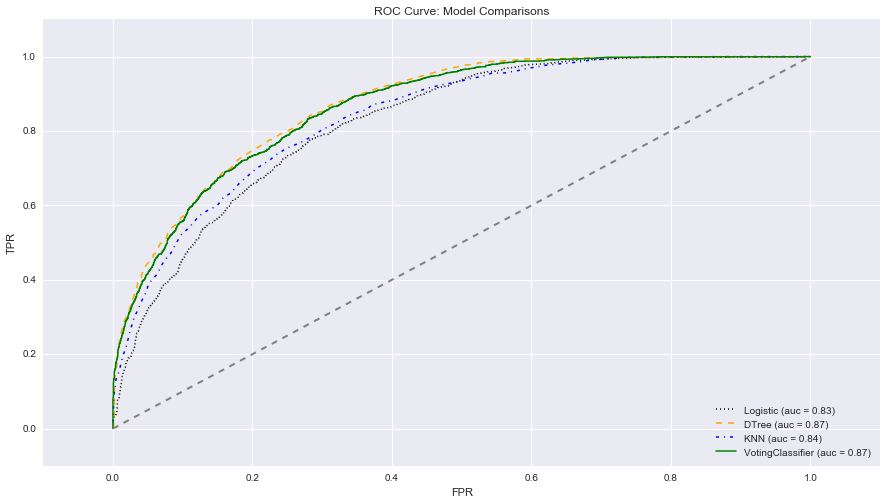

In [79]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

all_clf = [pipe1, clf2, pipe3, clf4]

colors = ['black','orange','blue','green','red']
linestyles = [':','--','-.','-',""]
plt.figure(figsize=(15,8))
for clf, label, clr, ls in zip(all_clf, clf_labels, colors, linestyles): # fit all clfs, get probabilities
    # assuming positive class is 1
    y_pred = clf.fit(X_train, y_train).predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_true=y_test, y_score=y_pred) # get false positive rate, true positive rate
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr, color = clr, linestyle=ls, label='%s (auc = %0.2f)' % (label, roc_auc), linewidth=1.5)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],linestyle='--', color='gray', linewidth=2) # plot random choice
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve: Model Comparisons')
plt.show()

As is obvious from our ROC curve, the extra step we took didnt exactly pay off: our stacked ensemble model performs just as well as our decision tree, indicating the predictions from each model were likely consistent. Based on our ROC curve, we can truly tell now if AUC is valuable. We noticed that our true positive rate maxes out with a 60% false positive rate, likely too high for our clients. This visualization will give our clients options, for instance, can they live with a 75% / 20% TPR / FPR? Business feedback is absolutely required here. Further, classifier accuracy on the test set proves to be in line with classifier accuracy on our validation set, indicating we are not overfitting, even with a large decision tree. For a one time analysis, this may be OK, but if our decision tree was used in online learning, pruning will likely be necessary to ENSURE it is more generalizable to new data.

Just for some fun, let's also plot some confusion matrices:

In [80]:
from sklearn.metrics import confusion_matrix # adapted from sklearn docs
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(df_alg.Outcome_Label)))
    plt.xticks(tick_marks, ['Adopted','Not Adopted'], rotation=45)
    plt.yticks(tick_marks, ['Adopted','Not Adopted'])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix
[[2587  599]
 [ 605 1555]]
Confusion Matrix Normalized
[[ 0.81198996  0.18801004]
 [ 0.28009259  0.71990741]]


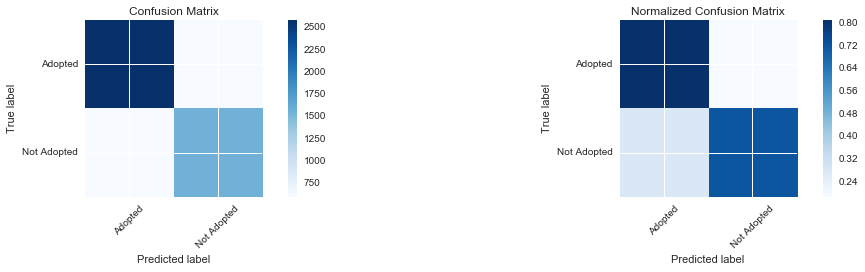

In [81]:
cm = confusion_matrix(clf4.predict(X_test),y_test)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print 'Confusion Matrix\n', cm
print 'Confusion Matrix Normalized\n', cm_normalized
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
plot_confusion_matrix(cm, title = 'Confusion Matrix')
plt.subplot(3,2,2)
plot_confusion_matrix(cm_normalized, title='Normalized Confusion Matrix')
plt.show()

## Classification Task 1: Model Differences: Statistical Comparison

Let's take a look at our highest AUC and accuracy classifiers: the stacked ensemble model and the decision tree and decide based on a 95% confidence interval if these models are truly different:

In [82]:
# is majority classifier better than decision tree?
acc1 = cross_val_score(clf2, X_train, y=y_train, cv=cv_object)
acc2 = cross_val_score(clf4, X_train, y=y_train, cv=cv_object)
auc1 = cross_val_score(clf2, X_train, y=y_train, cv=cv_object, scoring='roc_auc') 
auc2 = cross_val_score(clf4, X_train, y=y_train, cv=cv_object, scoring='roc_auc') 

In [83]:
t = 2.26 / np.sqrt(10) # 10 for 10 folds, t statistic is 2.26

e1 = (1-acc1)-(1-acc2) # subtract error rates
stdtot1 = np.std(e1)
dbar1 = np.mean(e1)
# std1 = np.std(acc1)
# std2 = np.std(acc2)

e2 = (1-auc1)-(1-auc2) # subtract error rates
stdtot2 = np.std(e2)
dbar2 = np.mean(e2)

print 'Accuracy range:[%0.3f, %0.3f]' %(dbar1-t*stdtot1, dbar1+t*stdtot1)  # this is the range of confidence interval
print np.mean(acc1), np.mean(acc2)
print 'AUC range:[%0.3f, %0.3f]' %(dbar2-t*stdtot2, dbar2+t*stdtot2)
print np.mean(auc1), np.mean(auc2)

Accuracy range:[-0.006, 0.003]
0.777440108782 0.775757167061
AUC range:[-0.005, 0.000]
0.867017236456 0.864460254199


We can expect that, 95% of the time we calculate the confidence interval as above, the true population mean difference between classifiers will be between -0.001 and 0.007 for accuracy and between -0.003 and 0.005 for AUC. Thus there is evidence to show there is no real difference between the two classifiers. 

Based on this result, we would choose to use our decision tree for this purpose, purely from a computing time standpoint and interpretation ability for our clients. Other ensemble models like random forests or bagging classifiers may work better, however, we have not tested them here.


## Classifier Summaries and Conclusion

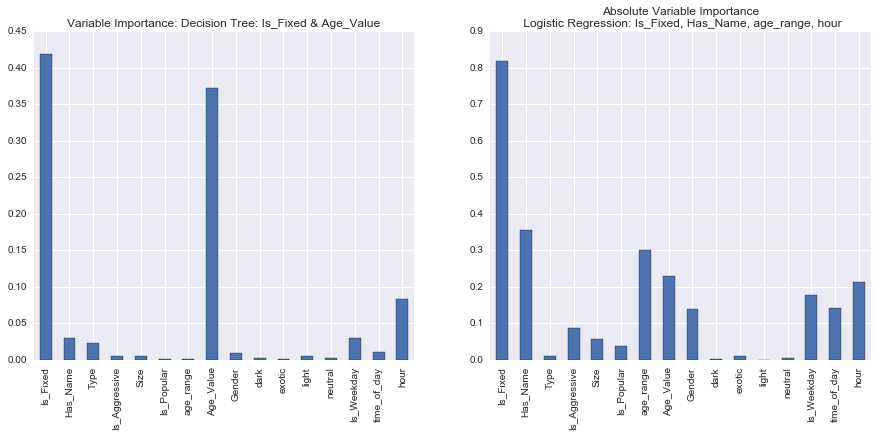

In [84]:
plt.figure(figsize=(15,20))


plt.subplot(3,2,1)
plt.title('Variable Importance: Decision Tree: %s & %s' %(X_train.columns[0], X_train.columns[7]))
importances = pd.Series(clf2.feature_importances_, index = X_train.columns)
importances.plot(kind='bar')

plt.subplot(3,2,2)
plt.title('Absolute Variable Importance\n Logistic Regression: %s, %s, %s, %s' 
          %(X_train.columns[0], X_train.columns[1], X_train.columns[6], X_train.columns[-1]))
weights = pd.Series(np.abs(clf1.coef_[0]), index= X_train.columns)
weights.plot(kind='bar')
plt.show()


Though we've extensively discussed advantages and disadvantages of Decision Trees and K-Nearest Neighbors, it is no surprise these models perform better than Logistic Regression. Both decision trees and KNN allow for more complicated decision boundaries, however, both can be overfit quickly depending on parameterization, which we optimized with a grid search. 

Further, the attributes most important to our classification purposes have been confirmed: Is_Intact and Age are consistently in the top 5 most important variables in our models where attribute importance is relevant (KNN not so much).

Is_Intact is the root of our decision tree with the highest information gain based on a gini index, while age represents the second split based on information gain and the CART algorithm in sklearn. One great attribute of decision trees is performance given redundant attributes. Splitting criteria used in decision trees often eliminates redundant attributes or features. As seen above, age_Range falls completely out of the picture for the decision tree, where age_range is impacted by a highly correlated attribute: age_value in logistic regression. 

Logistic regression weights were analyzed in detail previously, with Is_Intact, Age_Range and hour resulting in the largest scaled coefficients, that subsequently performed almost as well by themselves for validation as our full feature set. However, given our logistic regression model, weight coefficients can be impacted by redundant attributes, as is the case of age_range and age_value. Removing one of these features will result in a simpler model with less redundant attributes. As a logistic regression model is learned, weights are updated in totality, whereas in a decision tree, a feature may not be useful once its partner feature is included for splitting, because they likely explain the same impurity levels.

With KNN, we are not as concerned with attribute importance, rather, our lazy learner is only interested in the distances between observations. However, using the knowledge we've gained from our decision tree and logistic regression models, we could easily fit another learner, weighing the attributes appropriately based on previous research, and include it in stacked ensemble model.



<a id='task2'></a>
## Classification Task 2: Spayed/Neutered

#### Data Science Rational

In our particular dataset, we are generally able able to feed the spayed/neutered status of the animal directly into the model, and it one of the most important determinants of the ultimate adoption outcome of animals.

In other data sets, however, the data is likely to be less clean, and as this is such an important feature for model training, it is best not left to simple mode assignment of the status as we have done in the relatively rare case of our missing values.

Rather, if we can determine with relative confidence whether or not an animal is fixed based on other features in the data set, when can then use such a model for imputation of the values when it may be missing.

#### Business Rational

Based on our data analysis and model building, spaying/neutering an animal is the single most important thing owners and/or shelters can do to vastly increase the adoptability of an animal. This being the case, a key business model will be to determine the relative increase of adopability for an animal of a given set of characteristics, determinine the cost-effectiveness of the surgery for a given animal.

Moreover, as it will generally be cost-effective to perform the surgery on all but the most problemmatic animals (and even then, neutering may well also impact behavior as well, furthering adoptability). In this case, even when intake of an animal misses the accurate spay/neuter status of an animal, we will want to flag those as not being fixed and determine for certain their status. This check will go a long ways to not only having accurate data, but is a relatively low-cost exercise, and will allow the shelter to perform the surgery and increase adoptability as soon as animals are entered into the system and data processing (include ML) pushes them into the appropriate path for increase adoptability.

#### Learner Choices and Hyperparameter Tuning
We will be using the same models for the second classification task, and work to tune these independently with the same set of other features. However, even though the ultimate adoptability outcome is known in the data set, we are not using this for the determination of the spay/neuter status. While modeling with this feature down slightly increase the accuracy of the model, we do not want to create a circular feature derivation into our data mining. Also, for our business cases, we will not know the outcome at animal intake, so that is not a reasonable feature to train on, as it will not be available in a practical model usage scenario.

Thus, the outcome is removed as a feature for IsFixed classification for Task #2.

As stated above, we expect we may get good results with KNN and decision trees, but will sacrifice good direct feature weightin in these models as is available in a linear kernel with SVM as well as with logistic regression.

While we had initially included a visualization of the decision tree, we found that visualizing the entire tree to be cumbersone, even though useful in comparing a few select areas of the tree to determine specific features. Generally speaking, the model works well from a predictive perspective, but not provide a good means of rationalizing or explaining the model in practical terms. For that, we will rely on the factor weighting of logistic regression instead.


### K Nearest Neighbors

In [85]:
# let's formally create a test set from our training data, kaggle does not have a test set posted yet as competition
# has not concluded, taking care to stratify our training and testing set as well as our model search process.

# We will remove the outcome label as that we know is highly correlated with the is_fixed.

# May develop business case to determine this based on the others. Delta though is only 71.4% vs. 70%, so we will leave out the
# adoption outcome, and build out the case where for whatever reason the records are missing this value from a few cases.
# Thus, we will try to impute the value so as to put into a learning model.

#There is good discussion we can have here on the methodology of imputing using KNN that we should cover.

X = df_alg.iloc[:,2:-1]
y = df_alg.iloc[:,1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)

cv_object = StratifiedKFold(y=y_train, n_folds=10)

In [86]:
clf1 = KNeighborsClassifier(metric='minkowski', n_jobs=-1)

params = {'n_neighbors': np.arange(2,14,2), 'weights':['uniform', 'distance'], 'p':[1,2]}
# subclass the gridsearchcv and overwrite the functions 
grid_acc = GridSearchCV(estimator=clf1, param_grid=params, cv=cv_object, scoring='accuracy', n_jobs=-1)
grid_roc = GridSearchCV(estimator=clf1, param_grid=params, cv=cv_object, scoring='roc_auc', n_jobs=-1)
grid_acc.fit(scl.fit_transform(X_train), y_train)
grid_roc.fit(scl.fit_transform(X_train), y_train)

print 'best accuracy score: %s, best parameters: %s'%(grid_acc.best_score_, grid_acc.best_params_)
print 'best auc score: %s, best parameters: %s'%(grid_roc.best_score_, grid_roc.best_params_)

best accuracy score: 0.78978627882, best parameters: {'n_neighbors': 12, 'weights': 'uniform', 'p': 2}
best auc score: 0.781754362364, best parameters: {'n_neighbors': 12, 'weights': 'uniform', 'p': 1}


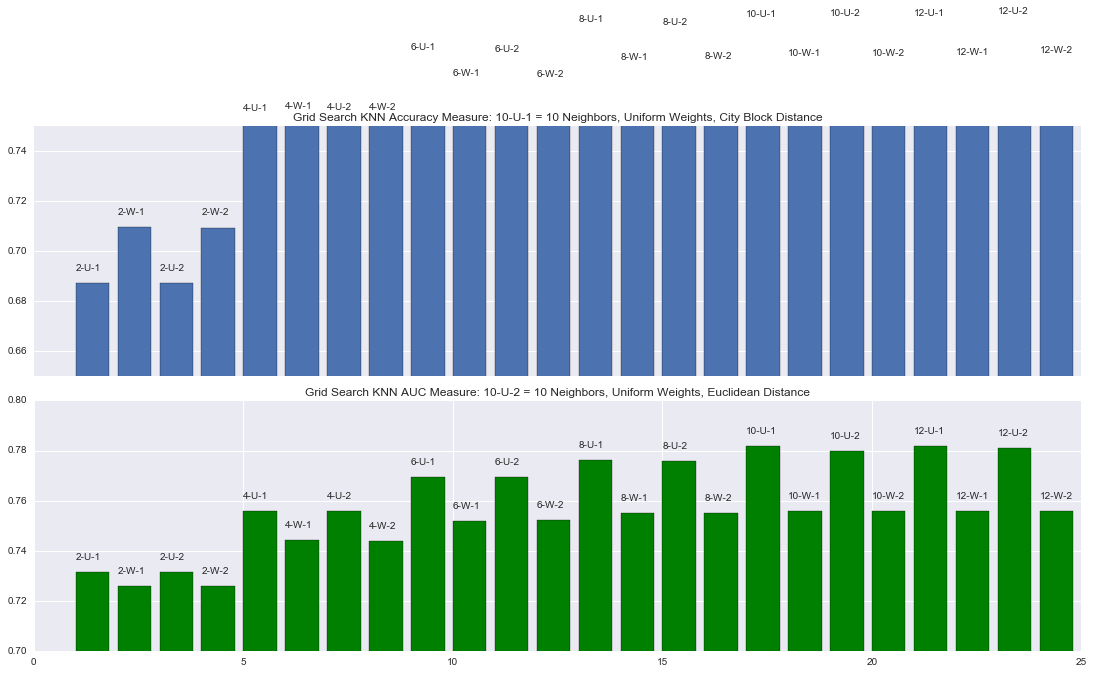

In [87]:
x_lab = ['2-U-1','2-W-1','2-U-2','2-W-2',
        '4-U-1','4-W-1','4-U-2','4-W-2',
        '6-U-1','6-W-1','6-U-2','6-W-2',
        '8-U-1','8-W-1','8-U-2','8-W-2',
        '10-U-1','10-W-1','10-U-2','10-W-2',
        '12-U-1','12-W-1','12-U-2','12-W-2',
        '14-U-1','14-W-1','14-U-2','14-W-2']

c = 0 # simple sentry var to loop through x labels
x = range(1,len(grid_acc.grid_scores_)+1)
y = pd.DataFrame(grid_acc.grid_scores_)['mean_validation_score'].values


fig = plt.figure(figsize=(30,8))
ax1 = fig.add_subplot(221)
plt.title('Grid Search KNN Accuracy Measure: 10-U-1 = 10 Neighbors, Uniform Weights, City Block Distance')
plt.ylim(.65,.75)
plt.xlim(0,25)
ax1.bar(x,y)
ax1.set_xticks([])
for a,b in zip(x,y):
    ax1.text(a,b+0.005,x_lab[c])
    c+=1
c = 0


y = pd.DataFrame(grid_roc.grid_scores_)['mean_validation_score'].values
ax2 = fig.add_subplot(223)
plt.title('Grid Search KNN AUC Measure: 10-U-2 = 10 Neighbors, Uniform Weights, Euclidean Distance')
plt.ylim(.7,.8)
plt.xlim(0,25)
ax2.bar(x,y, color='green')
for a,b in zip(x,y):
    ax2.text(a,b+0.005,x_lab[c])
    c+=1
    
plt.tight_layout()
plt.show()


### In this section we will discuss the grid search evaluation criteria and results.

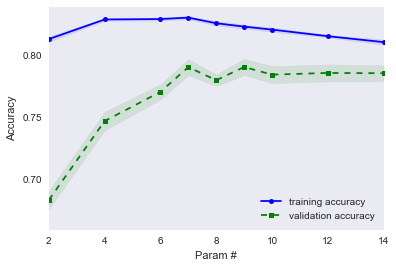

In [88]:
# Let's set up a pipeline to make things a bit easier to work with

clf1 = KNeighborsClassifier(metric='minkowski', p=1, weights='uniform', n_jobs=-1)
pipe1 = Pipeline([['sc', StandardScaler()], ['clf1', clf1]]) # set up a pipe to standardize KNN


param_range = [2, 4, 6, 7, 8, 9, 10, 12, 14] 

def fit_check(est, param, rng):
    train_scores, valid_scores = validation_curve(
                                                  estimator = est,
                                                  X = X_train,
                                                  y = y_train,
                                                  param_name = param,
                                                  param_range = rng,
                                                  cv = 5
                                                 )
    train_mean = np.mean(train_scores,axis=1)
    train_std = np.std(train_scores,axis=1)
    valid_mean = np.mean(valid_scores,axis=1)
    valid_std = np.std(valid_scores, axis=1)
    plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5,label='training accuracy')
    plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha = 0.1, color='blue')
    plt.plot(param_range, valid_mean, color='green', marker='s', linestyle='--', markersize=5,label='validation accuracy')
    plt.fill_between(param_range, valid_mean + valid_std, valid_mean - valid_std, alpha = 0.1, color='green')
    plt.grid()
    plt.legend(loc='lower right')
    plt.xlabel('Param #')
    plt.ylabel('Accuracy')
    plt.show()

fit_check(pipe1, 'clf1__n_neighbors', param_range)

### Here, we talk about N and how it relates to number of features, best value, etc.

In [89]:
from sklearn import metrics

clf1 = KNeighborsClassifier(metric='minkowski', p=1, n_neighbors=10, weights='uniform', n_jobs=-1)
pipe1 = Pipeline([['sc', StandardScaler()], ['clf1', clf1]]) # re-establish pipe and standardize KNN

pipe1.fit(X_train, y_train)

print accuracy_score(pipe1.predict(X_test), y_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, pipe1.predict_proba(X_test)[:,1])
print metrics.auc(fpr, tpr)



{'n_neighbors': 10, 'weights': 'uniform', 'p': 1}

0.78937523382
0.782751441767


{'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}

## Decision Tree

In [90]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
clf2 = DecisionTreeClassifier()

params = {'max_depth' : np.arange(1,10,1), 
          'min_samples_leaf' : [5, 10, 15, 50, 100], 
          'min_samples_split' : [50, 80, 100, 120, 150],
          'max_features' : ['sqrt','log2',None]}

grid_acc = GridSearchCV(estimator=clf2,param_grid=params,cv=cv_object,scoring='accuracy',n_jobs=-1)
grid_roc = GridSearchCV(estimator=clf2,param_grid=params,cv=cv_object,scoring='roc_auc',n_jobs=-1)
grid_acc.fit(X_train, y_train)
grid_roc.fit(X_train, y_train)

print 'best accuracy score: %s, best parameters: %s'%(grid_acc.best_score_, grid_acc.best_params_)
print 'best auc score: %s, best parameters: %s'%(grid_roc.best_score_, grid_roc.best_params_)

best accuracy score: 0.823644951597, best parameters: {'max_features': None, 'min_samples_split': 50, 'max_depth': 7, 'min_samples_leaf': 50}
best auc score: 0.824281404655, best parameters: {'max_features': None, 'min_samples_split': 50, 'max_depth': 8, 'min_samples_leaf': 100}


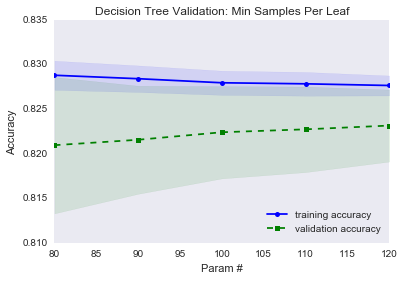

In [91]:
clf2 = DecisionTreeClassifier(max_depth=9, max_features = None, min_samples_leaf = 10)
param_range = [80, 90, 100, 110, 120]

plt.title('Decision Tree Validation: Min Samples Per Leaf')
fit_check(clf2, 'min_samples_split', param_range)

In [92]:
clf2 = DecisionTreeClassifier(max_depth=9, max_features = None, min_samples_leaf = 10, min_samples_split = 110)

clf2.fit(X_train, y_train)
print accuracy_score(clf2.predict(X_test), y_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, clf2.predict_proba(X_test)[:,1])
print metrics.auc(fpr, tpr)

0.820987654321
0.815721863355


### Add in the model parameters and summary here
#### Woo Hoo! To 82% here!

### Logistic Regression

In [93]:
scl = StandardScaler()
lr = LogisticRegression()

cv_object = StratifiedKFold(y=y_train, n_folds=10)

In [94]:
accuracies = cross_val_score(lr, scl.fit_transform(X_train), y=y_train, cv=cv_object, verbose= 0) 
print(accuracies)
print 'average accuracy', np.average(accuracies)

[ 0.74474053  0.74754558  0.74380552  0.73058934  0.74649205  0.74181478
  0.74415341  0.74462114  0.73854069  0.73994387]
average accuracy 0.742224691692


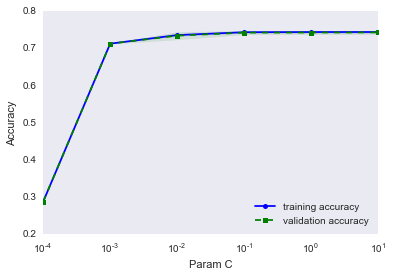

In [95]:
# take a look at C levels and associated accuracy on a stratified 10 fold CV
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]
train_scores, valid_scores = validation_curve(
                                             estimator = pipe_lr,
                                             X = X_train,
                                             y = y_train,
                                             param_name = 'clf__C', # vary the C parameter directly
                                             param_range = param_range,
                                             cv = 10
                                             )
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
valid_mean = np.mean(valid_scores,axis=1)
valid_std = np.std(valid_scores, axis=1)
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5,label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha = 0.1, color='blue')
plt.plot(param_range, valid_mean, color='green', marker='s', linestyle='--', markersize=5,label='validation accuracy')
plt.fill_between(param_range, valid_mean + valid_std, valid_mean - valid_std, alpha = 0.1, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Param C')
plt.ylabel('Accuracy')
plt.show()

0.733760410148
[ 0.74193548  0.74801309  0.71248247  0.73199252  0.74695978  0.72310571
  0.73573433  0.73292797  0.72965388  0.73479888]


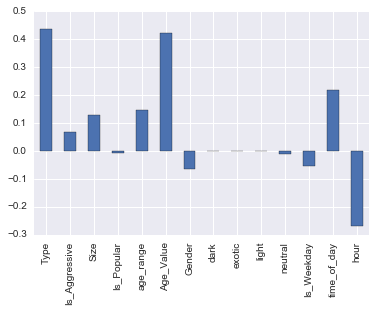

In [96]:
lr_final = LogisticRegression(penalty='l1', C=0.01)
accuracies = cross_val_score(lr_final, scl.fit_transform(X_train), y_train, cv=cv_object) 
print np.average(accuracies)
print accuracies

lr_final.fit(scl.fit_transform(X_train),y_train)
weights = pd.Series(lr_final.coef_[0], index= df_alg.columns[2:-1])
weights.plot(kind='bar')
plt.show()


## Business Case for Classification Task 2: Spayed or Neutered
When an animal goes into an animal shelter there are many things that need to be recorded about the animal before it is accepted.  Information such as age, type of animal, breed, weight, gender, and whether or not the animal is spayed or neutered are some variables that need to be collected.  Identification of male animals that have been been neutered is fairly straightforward but can be more difficult for female animals and determining if they have been spayed.  This is made more difficult for stray animals that are brought in, for whom this information is not readily available.  Therefore it would be useful to have a prediction model that looks at all the other statistics about an animal and can predict with a high level of accuracy whether that animal has been spayed or neutered.  If the animal brought in has not been fixed, then the proper steps can be taken.  The use of our previous model, which predicts the outcome of an animal brought into a shelter, strengthens the case for providing a model for spayed or neutered animals.  We discovered that it is possible to predict whether an animal will be adopted based on information gathered by the animal shelter.  Of these variables, the most important were fixed, and age.  Animals that were fixed had a higher chance of getting adopted.  For animal shelters trying to get people to adopt animals, knowing that fixed animals have a greater chance of adoption suggests that performing spaying and neutering of animals arriving to the shelter that have not already been fixed is a good practice.


## Deployment
The model we have created has been successful in classifying two variables: outcome and spayed or neutered.  Interested parties would be the Austin animal shelter in Austin, TX or any other animal shelter that has a no kill policy.  We used three different classification models to try and predict our target variables, with each classification task having an accuracy of ~78% for each model and classification task.  

We could measure the model's value if it were used by these parties by comparing adoption outcomes as a percentage of animals brought into the shelter before and after the model was implemented.  This would show a concrete value as to how well our model was doing in helping place animals into new homes.  

A way that our model could be deployed by clients would be as a reference for numbers, as well as a visual aid to help identify areas that could be targeted to improve the number of adoptions.  From a numbers standpoint, our model highlights the variables that affect the outcome of an animal once it reaches the shelter.  Knowing this information could give the client areas to focus on and give more attention to.  Our model also gave a few visuals that identified what variables affected animal.  For example animals with names, or were fixed, or were younger had a higher chance of getting adopted.  Knowing this could give the clients new business practices to implement.  With this in mind there was some data not available in the training set obtained from Kaggle that could improve our model.  While we added a variable for aggressive behavior, this was based purely on a list obtained from a site stating what the most aggressive breeds of dogs were.  This did not include any cat information and would likely vary on a case to case basis.  If the aggressiveness of the animals entering the shelter were included, this could provide valuable information to increase the effectiveness of the model.  Another variable that could be recorded is whether the animal is up to date on its shots.  It is possible that if an animal needs shots, people might be less likely to adopt it as this would be an additional cost.  Depending on the cost to the client, they might give shots to animals that need them to increase the number of animals that get adopted.  

The model would need to be updated every few years.  Our model is built on data collected from the Austin Animal Shelter from October 2013 to March 2016.  So primarily this data and model would benefit the Austin Shelter the most, but it could be applied to other shelters.  For other shelters though, it might be best to use data from their own shelters and run it through our model.  
